<a href="https://colab.research.google.com/github/sanjana-singamsetty/Finance-expense-tracker/blob/main/ishan_dataset_implementation_of_models_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents

- [1. Loading Libraries and Data](#loading-libraries-and-data)
- [2. Starting to Cleaning and Reading Data](#starting-to-cleaning-and-reading-data)
- [3. Drop Impractical Columns](#drop-impractical-columns)
- [4. Removing Outliers (Sales)](#removing-outliers-sales)
- [5. Prepare for Time-Series](#prepare-for-time-series)
- [6. Exploring Data (Numerical & Categorical)](#exploring-data-numerical--categorical)
- [7. Exploring Time-Series Charts](#exploring-time-series-charts)
  - [7.1 Visualize the Time Series (Line Plot)](#visualize-the-time-series-line-plot)
  - [7.2 Rolling Mean](#rolling-mean)
  - [7.3 Decomposition (Separating Trend, Seasonality, and Residuals)](#decomposition-separating-trend-seasonality-and-residuals)
  - [7.4 Seasonal Plots: Comparing Sales Across Different Time Periods](#seasonal-plots-comparing-sales-across-different-time-periods)
  - [7.5 Stationarity Check](#stationarity-check)
  - [7.6 Autocorrelation and Partial Autocorrelation](#autocorrelation-and-partial-autocorrelation)
  - [7.7 Feature Impacts](#feature-impacts)
- [8. Modelling](#modelling)
  - [8.1 ARIMA](#arima)
  - [8.2 SARIMA](#sarima)
  - [8.3 FB Prophet](#fb-prophet)



# 1. Loading Libraries and Data
<a id="loading-libraries-and-data"></a>

In [145]:
import warnings
warnings.filterwarnings("ignore")

In [146]:
!pip install sweetviz


In [147]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from scipy import stats
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score


In [148]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ishanshrivastava28/superstore-sales")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ishanshrivastava28/superstore-sales/versions/1


In [149]:
import os

# Define the directory path
dir_path = "/root/.cache/kagglehub/datasets/ishanshrivastava28/superstore-sales/versions/1"

# List all files in the directory
files = os.listdir(dir_path)

# Print the file names
print(files)


['Superstore.xlsx', 'Superstore.csv']


In [150]:
import pandas as pd

# Define the file path
file_path = "/root/.cache/kagglehub/datasets/ishanshrivastava28/superstore-sales/versions/1/Superstore.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path, encoding='ISO-8859-1')



# Display the first few rows
print(df.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2013-152156  09-11-2013  12-11-2013    Second Class    CG-12520   
1       2  CA-2013-152156  09-11-2013  12-11-2013    Second Class    CG-12520   
2       3  CA-2013-138688  13-06-2013  17-06-2013    Second Class    DV-13045   
3       4  US-2012-108966  11-10-2012  18-10-2012  Standard Class    SO-20335   
4       5  US-2012-108966  11-10-2012  18-10-2012  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [151]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2011-110422,22-01-2011,24-01-2011,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2014-121258,27-02-2014,04-03-2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2014-121258,27-02-2014,04-03-2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2014-121258,27-02-2014,04-03-2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


# 2. Starting to Clean and Read Data
<a id="starting-to-cleaning-and-reading-data"></a>

In [152]:
report = sv.analyze(df)
report.show_html('report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [153]:
def comprehensive_df_overview(dataframe):
    print("##### Shape")
    print(dataframe.shape)
    print("\n##### Data Types")
    print(dataframe.dtypes)
    print("\n##### Columns")
    print(dataframe.columns)
    print("\n##### Index")
    print(dataframe.index)
    print("\n##### Head")
    print(dataframe.head())
    print("\n##### Tail")
    print(dataframe.tail())
    print("\n##### NA")
    print(dataframe.isnull().values.any())
    print("\n##### NA Sum - Ratio")
    print(pd.DataFrame({"na_sum": dataframe.isnull().sum(), "ratio": dataframe.isnull().sum() / dataframe.shape[0]}))

    numeric_cols = dataframe.select_dtypes(include=['number']).columns
    if not numeric_cols.empty:
        print("\n##### Basic Statistics (Numeric Columns)")
        print(dataframe[numeric_cols].describe().T)
        print("\n##### Skewness (Numeric Columns)")
        print(dataframe[numeric_cols].skew())
        print("\n##### Kurtosis (Numeric Columns)")
        print(dataframe[numeric_cols].kurtosis())
        print("\n##### Correlation Matrix (Numeric Columns)")
        print(dataframe[numeric_cols].corr())
    else:
        print("\nNo numeric columns found for statistical analysis.")

    non_numeric_cols = dataframe.select_dtypes(exclude=['number']).columns
    if not non_numeric_cols.empty:
        print("\n##### Basic Statistics (Non-Numeric Columns)")
        print(dataframe[non_numeric_cols].describe().T)
    else:
        print("\nNo non-numeric columns found for statistical analysis.")

    print("\n##### Unique Values per Column")
    print(dataframe.nunique())
    print("\n##### Sample Rows")
    print(dataframe.sample(5))
    print("\n##### Memory Usage")
    print(dataframe.memory_usage(deep=True))

comprehensive_df_overview(df)

##### Shape
(9994, 21)

##### Data Types
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

##### Columns
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

##### Index
RangeIndex(start=0, stop=9994, step=1)

##### Head
   Row ID        Order ID  Orde

# 3. Drop Impractical Columns
<a id="drop-impractical-columns"></a>

In [154]:
df = df.drop(columns=["Row ID", "Order ID", "Ship Date", "Customer Name", "Country", "Postal Code", "Product Name","Quantity","Discount","Profit"])

In [155]:
df

,Order Date,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Sales
0,09-11-2013,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,09-11-2013,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,731.9400
2,13-06-2013,Second Class,DV-13045,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,11-10-2012,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,957.5775
4,11-10-2012,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,22.3680
...,...,...,...,...,...,...,...,...,...,...,...
9989,22-01-2011,Second Class,TB-21400,Consumer,Miami,Florida,South,FUR-FU-10001889,Furniture,Furnishings,25.2480
9990,27-02-2014,Standard Class,DB-13060,Consumer,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,91.9600
9991,27-02-2014,Standard Class,DB-13060,Consumer,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,258.5760
9992,27-02-2014,Standard Class,DB-13060,Consumer,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,29.6000


# 4. Removing Outliers (Sales)
<a id="removing-outliers-sales"></a>

In [156]:
def handle_outliers(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[[column]].dropna()))
    df = df[(z_scores < threshold).all(axis=1)]

    return df

In [157]:
df = handle_outliers(df, "Sales")

In [158]:
df

,Order Date,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Sales
0,09-11-2013,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,09-11-2013,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,731.9400
2,13-06-2013,Second Class,DV-13045,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,11-10-2012,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,957.5775
4,11-10-2012,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,22.3680
...,...,...,...,...,...,...,...,...,...,...,...
9989,22-01-2011,Second Class,TB-21400,Consumer,Miami,Florida,South,FUR-FU-10001889,Furniture,Furnishings,25.2480
9990,27-02-2014,Standard Class,DB-13060,Consumer,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,91.9600
9991,27-02-2014,Standard Class,DB-13060,Consumer,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,258.5760
9992,27-02-2014,Standard Class,DB-13060,Consumer,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,29.6000


# 5. Prepare for Time-Series
<a id="prepare-for-time-series"></a>

In [159]:
def prepare_for_timeseries(dataframe):


    dataframe = dataframe.sort_values(by='Order Date')

    dataframe.reset_index(drop=True, inplace=True)

    print("##### Data Preparation Completed")
    print("\n##### Sorted DataFrame Head")
    print(dataframe.head())

    return dataframe

df = prepare_for_timeseries(df)

##### Data Preparation Completed

##### Sorted DataFrame Head
   Order Date       Ship Mode Customer ID    Segment          City  \
0  01-01-2014  Standard Class    KL-16555  Corporate          Reno   
1  01-01-2014     First Class    DB-13660   Consumer     Lancaster   
2  01-01-2014  Standard Class    EP-13915   Consumer  Jacksonville   
3  01-01-2014  Standard Class    EP-13915   Consumer  Jacksonville   
4  01-01-2014  Standard Class    BD-11620   Consumer       Anaheim   

        State Region       Product ID         Category Sub-Category    Sales  
0      Nevada   West  OFF-BI-10003984  Office Supplies      Binders  159.768  
1        Ohio   East  OFF-ST-10002554  Office Supplies      Storage  156.512  
2     Florida  South  OFF-AR-10000588  Office Supplies          Art   47.616  
3     Florida  South  OFF-PA-10002250  Office Supplies        Paper   23.480  
4  California   West  TEC-PH-10002563       Technology       Phones  302.376  


In [160]:
df

,Order Date,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Sales
0,01-01-2014,Standard Class,KL-16555,Corporate,Reno,Nevada,West,OFF-BI-10003984,Office Supplies,Binders,159.768
1,01-01-2014,First Class,DB-13660,Consumer,Lancaster,Ohio,East,OFF-ST-10002554,Office Supplies,Storage,156.512
2,01-01-2014,Standard Class,EP-13915,Consumer,Jacksonville,Florida,South,OFF-AR-10000588,Office Supplies,Art,47.616
3,01-01-2014,Standard Class,EP-13915,Consumer,Jacksonville,Florida,South,OFF-PA-10002250,Office Supplies,Paper,23.480
4,01-01-2014,Standard Class,BD-11620,Consumer,Anaheim,California,West,TEC-PH-10002563,Technology,Phones,302.376
...,...,...,...,...,...,...,...,...,...,...,...
9862,31-12-2014,Standard Class,PO-18865,Consumer,New York City,New York,East,TEC-PH-10004774,Technology,Phones,90.930
9863,31-12-2014,Standard Class,PO-18865,Consumer,New York City,New York,East,FUR-BO-10003441,Furniture,Bookcases,323.136
9864,31-12-2014,Standard Class,EB-13975,Corporate,Fairfield,California,West,OFF-BI-10002103,Office Supplies,Binders,13.904
9865,31-12-2014,Standard Class,JM-15580,Consumer,Loveland,Colorado,West,OFF-FA-10003472,Office Supplies,Fasteners,3.024


# 6. Exploring Data (Numerical & Categorical)
<a id="exploring-data"></a>

In [161]:
def fetch_col_names(dataframe):
    # Categorical columns: columns with object dtype
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'O']

    # Numerical columns: columns with non-object dtype
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    return cat_cols, num_cols

cat_cols, num_cols = fetch_col_names(df)

In [162]:
cat_cols

['Order Date',
 'Ship Mode',
 'Customer ID',
 'Segment',
 'City',
 'State',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category']

In [163]:
num_cols

['Sales']

In [164]:
def cat_details(dataframe, col_name, plot=False):
    # Count and ratio of unique values
    value_counts = dataframe[col_name].value_counts()
    ratio = 100 * value_counts / len(dataframe)

    # Calculate the length of the summary line
    summary_length = len(col_name) + len(" Details ")
    border_length = max(50, summary_length + 4)

    # Create border lines
    top_border = '#' * border_length
    middle_border = f"{'#' * 10} {col_name} Details {'#' * 10}".center(border_length, '#')
    bottom_border = '#' * border_length

    # Print summary
    print(f"\n{top_border}")
    print(middle_border)
    print(pd.DataFrame({col_name: value_counts, "Ratio (%)": ratio}))
    print(f"\n{col_name} has {dataframe[col_name].nunique()} unique values.")
    print(f"{bottom_border}\n")

    # Plot count plot if plot is True
    if plot:
        plt.figure(figsize=(10, 6))
        plt.bar(value_counts.index, value_counts.values)
        plt.title(f"Count Plot for {col_name}")
        plt.xlabel(col_name)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()


##################################################
############### Ship Mode Details ################
                Ship Mode  Ratio (%)
Ship Mode                           
Standard Class       5896  59.754738
Second Class         1918  19.438532
First Class          1518  15.384615
Same Day              535   5.422114

Ship Mode has 4 unique values.
##################################################



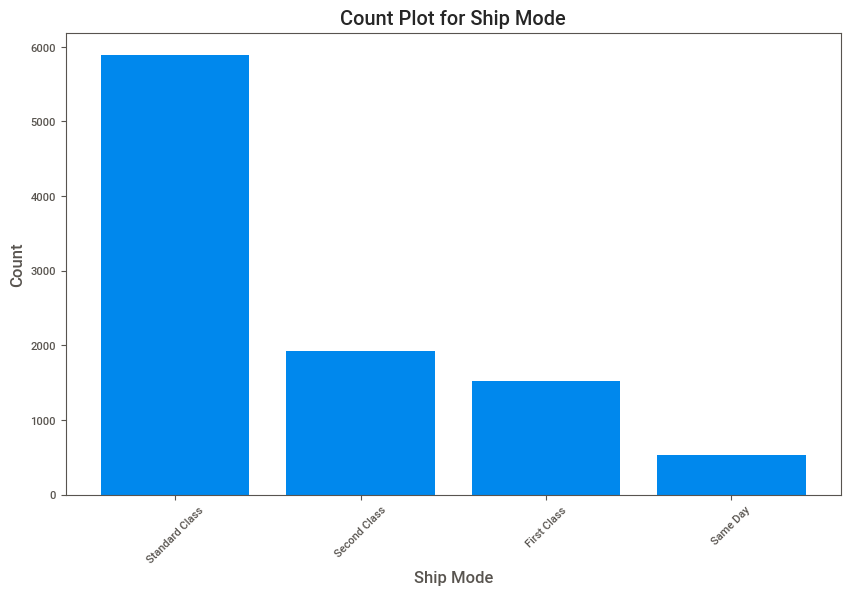


##################################################
################ Segment Details #################
             Segment  Ratio (%)
Segment                        
Consumer        5130  51.991487
Corporate       2981  30.211817
Home Office     1756  17.796696

Segment has 3 unique values.
##################################################



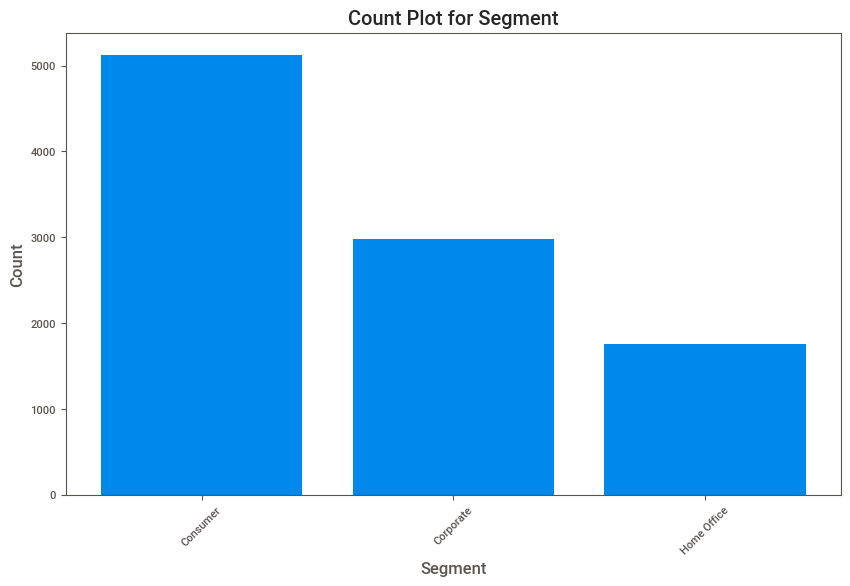


##################################################
################# State Details ##################
                      State  Ratio (%)
State                                 
California             1977  20.036485
New York               1101  11.158407
Texas                   977   9.901693
Pennsylvania            583   5.908584
Washington              497   5.036992
Illinois                490   4.966048
Ohio                    468   4.743083
Florida                 380   3.851221
Michigan                250   2.533698
North Carolina          246   2.493159
Arizona                 224   2.270194
Virginia                217   2.199250
Colorado                181   1.834397
Tennessee               181   1.834397
Georgia                 180   1.824263
Indiana                 146   1.479680
Kentucky                136   1.378332
Massachusetts           135   1.368197
New Jersey              126   1.276984
Oregon                  124   1.256714
Wisconsin               109   1.104692


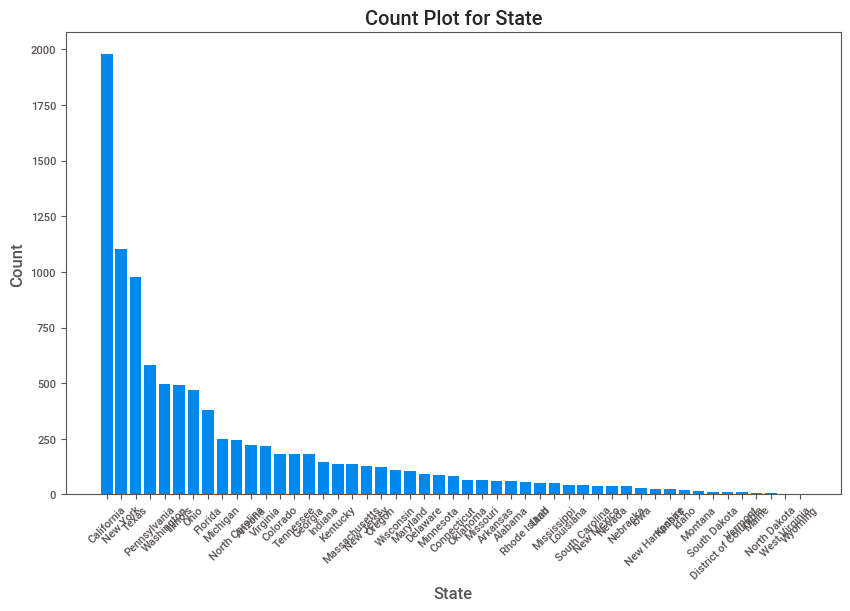


##################################################
################# Region Details #################
         Region  Ratio (%)
Region                    
West       3166  32.086754
East       2806  28.438228
Central    2299  23.299889
South      1596  16.175129

Region has 4 unique values.
##################################################



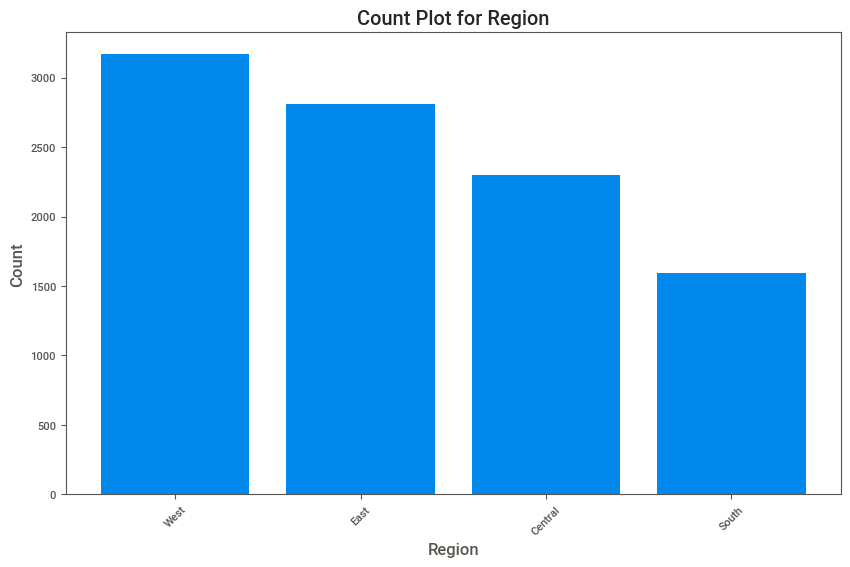


##################################################
################ Category Details ################
                 Category  Ratio (%)
Category                            
Office Supplies      5995  60.758082
Furniture            2088  21.161447
Technology           1784  18.080470

Category has 3 unique values.
##################################################



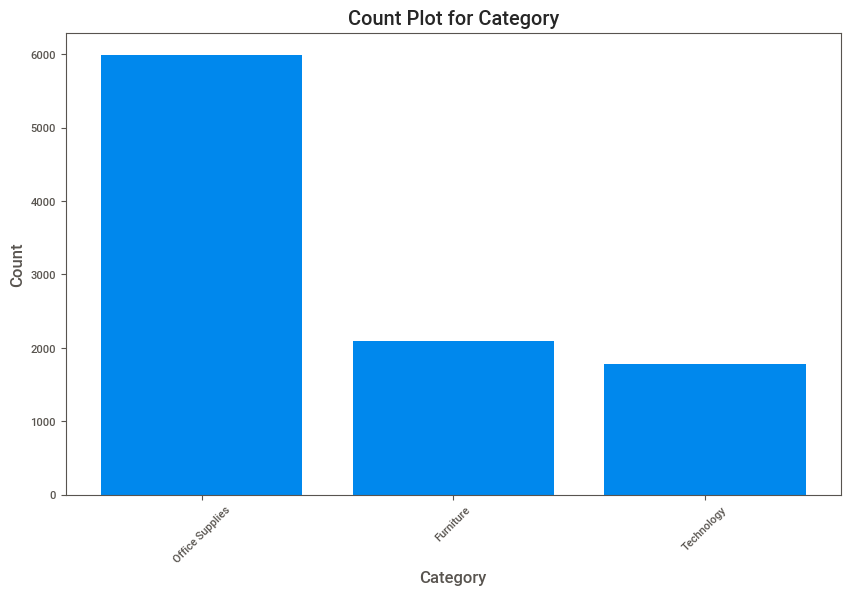


##################################################
############## Sub-Category Details ##############
              Sub-Category  Ratio (%)
Sub-Category                         
Binders               1505  15.252863
Paper                 1370  13.884666
Furnishings            957   9.698997
Phones                 877   8.888213
Storage                844   8.553765
Art                    796   8.067295
Accessories            771   7.813925
Chairs                 602   6.101145
Appliances             461   4.672139
Labels                 364   3.689065
Tables                 308   3.121516
Envelopes              254   2.574237
Bookcases              221   2.239789
Fasteners              217   2.199250
Supplies               184   1.864802
Machines                86   0.871592
Copiers                 50   0.506740

Sub-Category has 17 unique values.
##################################################



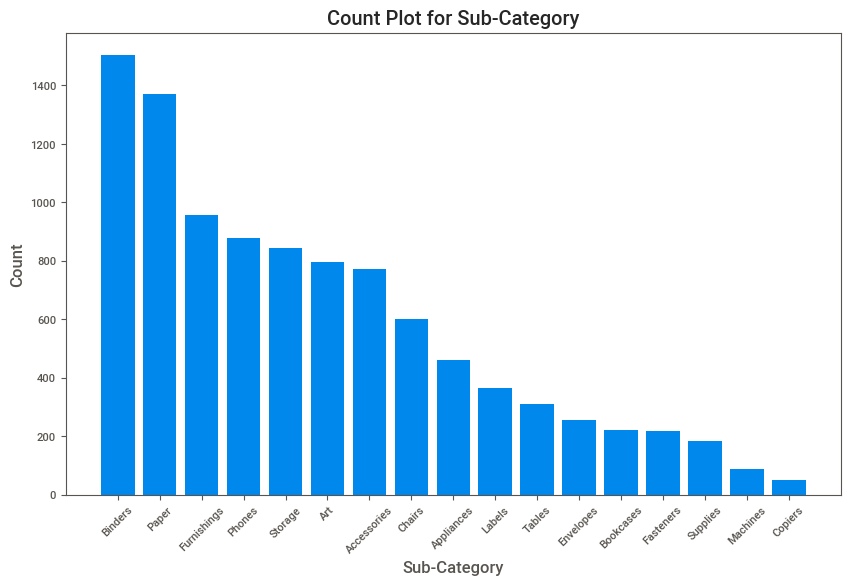

In [165]:
for col in ["Ship Mode", "Segment", "State", "Region", "Category", "Sub-Category"]:
    cat_details(df, col, plot=True)

In [166]:
def num_details(dataframe, col_name, plot=False, quantiles=[0.05, 0.10, 0.20, 0.50, 0.60, 0.80, 0.90, 0.95, 0.99]):
    if plot:
        dataframe[col_name].hist(bins=20)
        plt.xlabel(col_name)
        plt.title(col_name)
        plt.show(block=True)

    # Calculate the length of the summary line
    summary_length = len(col_name) + len(" Details ")
    border_length = max(50, summary_length + 4)

    # Create border lines
    top_border = '#' * border_length
    middle_border = f"{'#' * 10} {col_name} Details {'#' * 10}".center(border_length, '#')
    bottom_border = '#' * border_length

    # Print summary
    print(f"\n{top_border}")
    print(middle_border)
    print(dataframe[col_name].describe(percentiles=quantiles).T, end="\n\n")
    print(f"{bottom_border}\n")

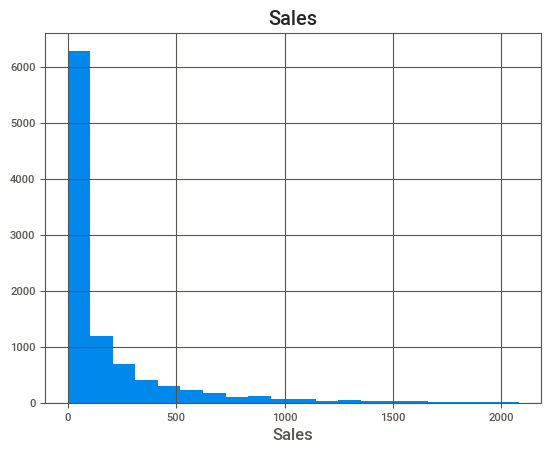


##################################################
################# Sales Details ##################
count    9867.000000
mean      180.558231
std       304.150818
min         0.444000
5%          4.941600
10%         7.860000
20%        13.481600
50%        52.096000
60%        86.143200
80%       265.860000
90%       523.312800
95%       838.146000
99%      1564.830600
max      2079.400000
Name: Sales, dtype: float64

##################################################



In [167]:
for col in num_cols:
    num_details(df, col, plot=True)

# 7. Exploring Time-Series Charts
<a id="exploring-time-series-charts"></a>

## 7.1 Visualize the Time Series (Line Plot)
<a id="visualize-time-series"></a>

In [168]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce', dayfirst=True)
df['month'] = df['Order Date'].dt.to_period('M')

mdf = df.groupby('month')['Sales'].sum()
mdf = pd.DataFrame(mdf)
mdf.head()


,Sales
month,
2011-01,11372.409
2011-02,4810.558
2011-03,29552.599
2011-04,24131.295
2011-05,20932.357


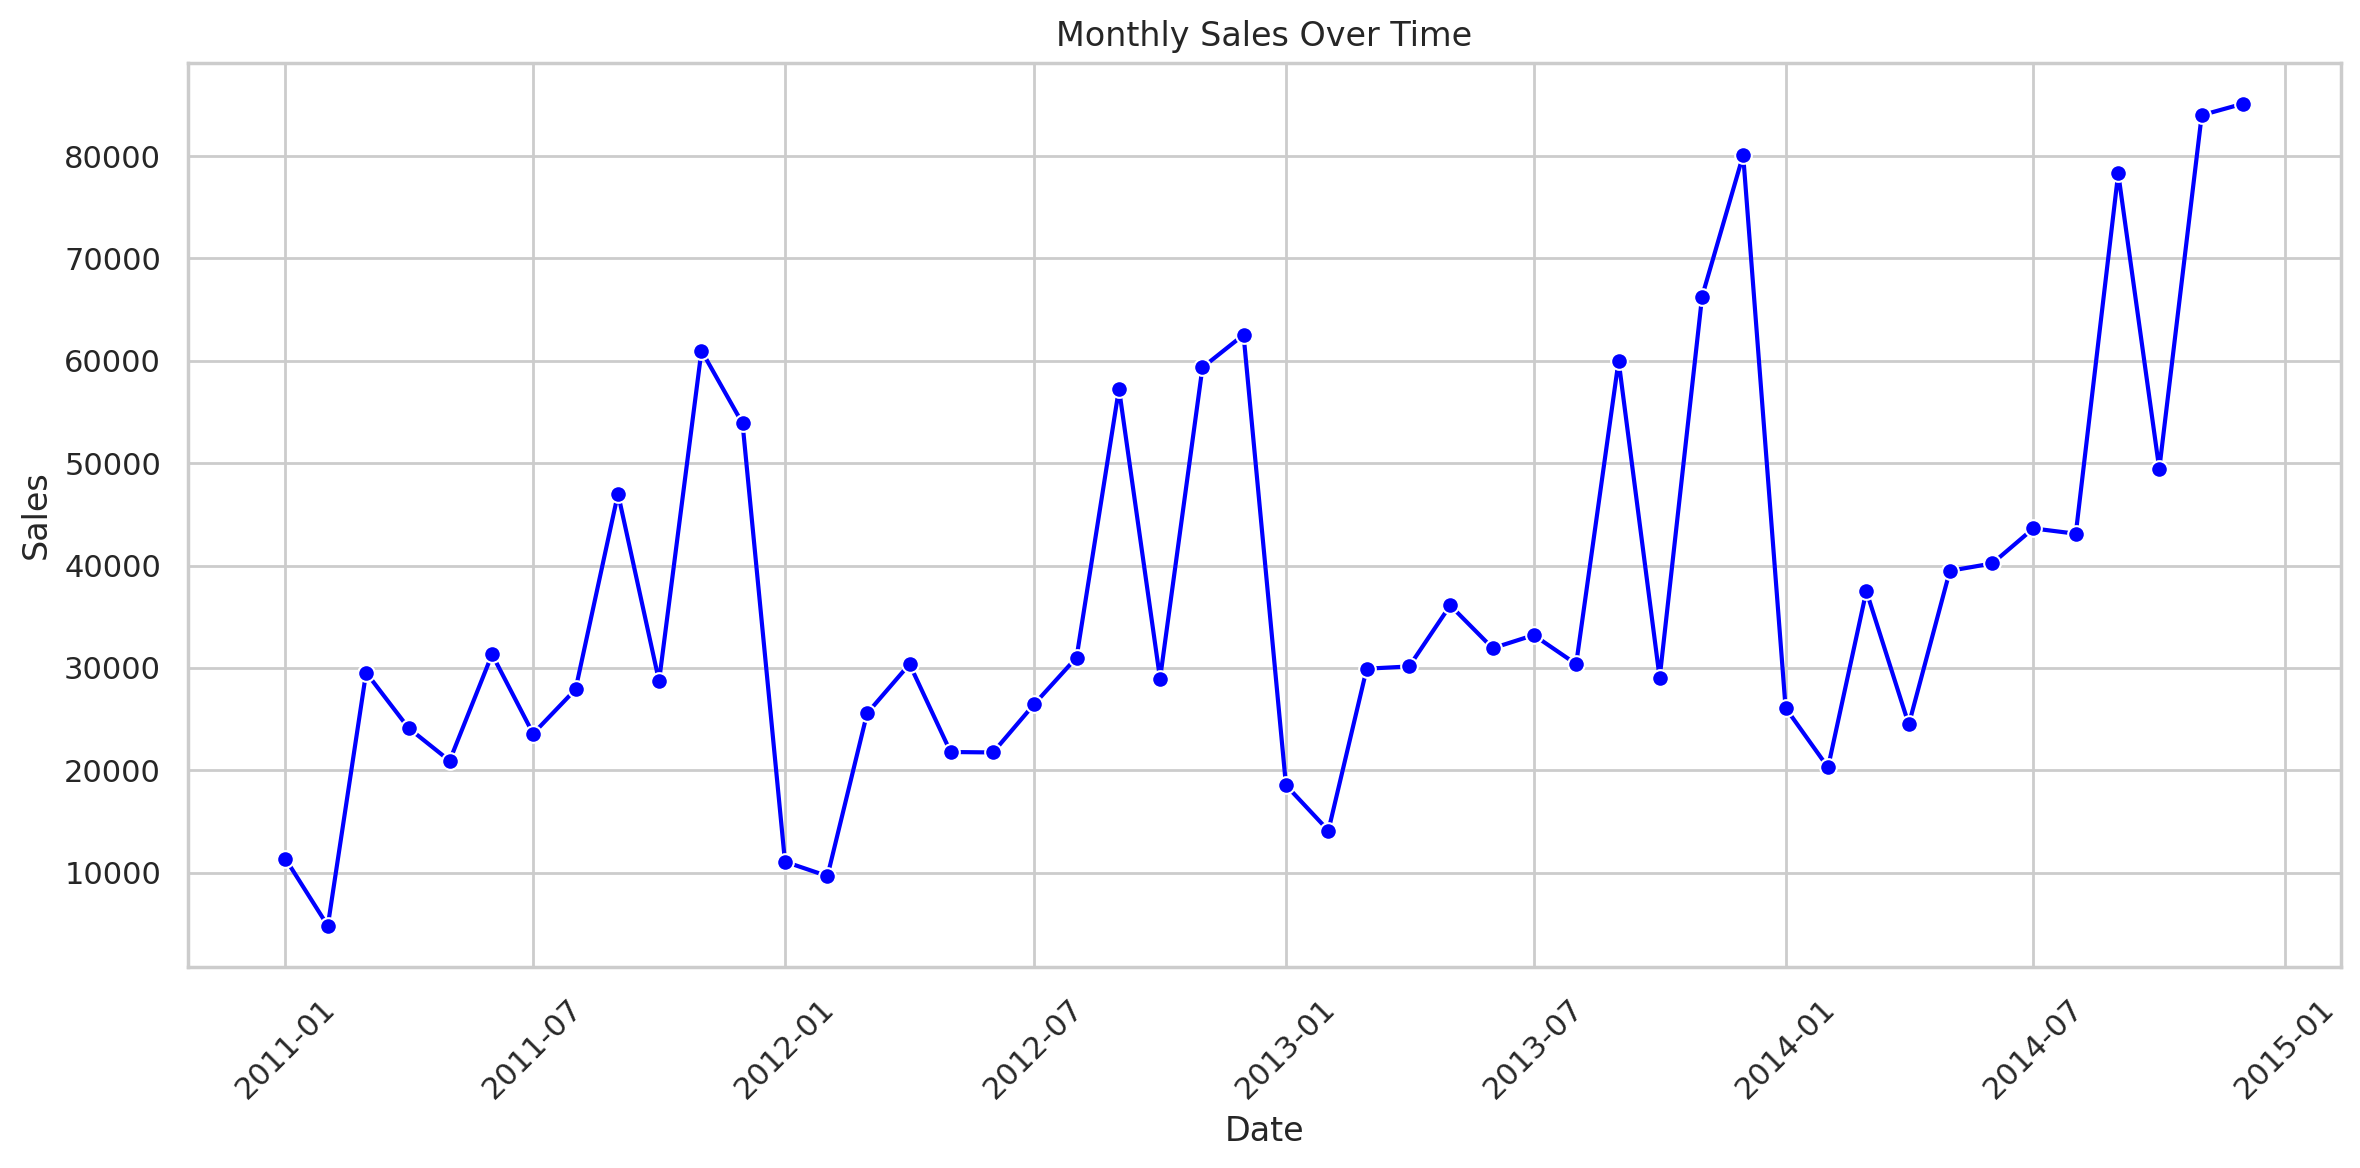

In [169]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6), dpi=200)

if isinstance(mdf.index, pd.PeriodIndex):
    mdf.index = mdf.index.to_timestamp()

sns.lineplot(data=mdf, x=mdf.index, y='Sales', marker='o', color='blue')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7.2 Rolling Mean
<a id="rolling-mean"></a>

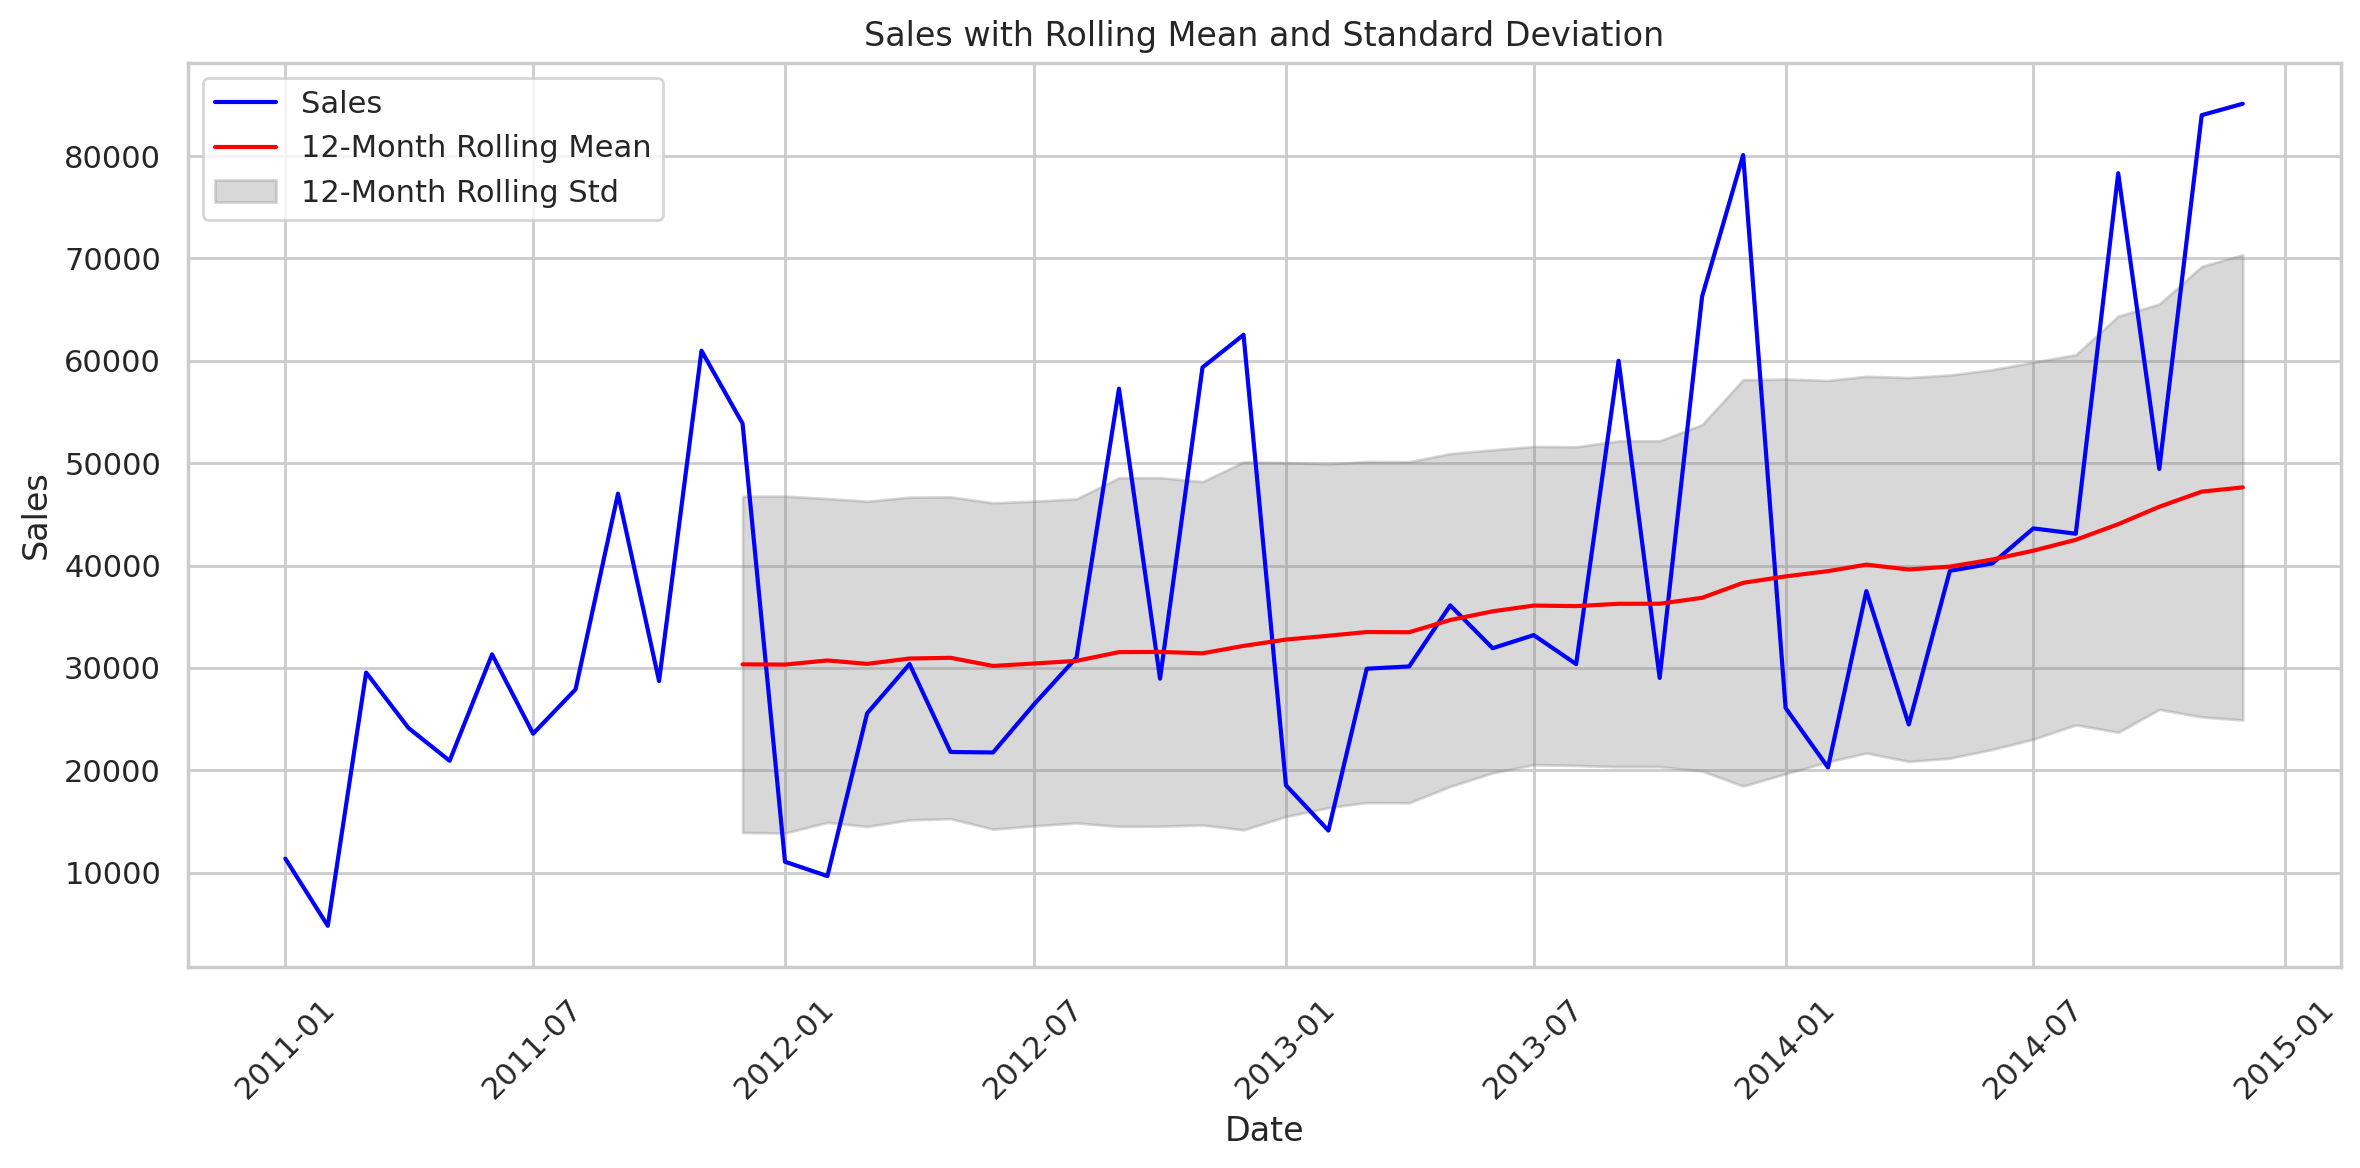

In [170]:
# Set the rolling window size (12 months)
window_size = 12

# Calculate the rolling mean and standard deviation
mdf['Rolling_Mean'] = mdf['Sales'].rolling(window=window_size).mean()
mdf['Rolling_Std'] = mdf['Sales'].rolling(window=window_size).std()

# Plot the original sales data
plt.figure(figsize=(12, 6), dpi=200)
sns.lineplot(data=mdf, x=mdf.index, y='Sales', label='Sales', color='blue')

# Plot the rolling mean
sns.lineplot(data=mdf, x=mdf.index, y='Rolling_Mean', label=f'{window_size}-Month Rolling Mean', color='red')

# Plot the rolling standard deviation (as a shaded area to indicate volatility)
plt.fill_between(mdf.index, mdf['Rolling_Mean'] - mdf['Rolling_Std'], mdf['Rolling_Mean'] + mdf['Rolling_Std'],
                 color='gray', alpha=0.3, label=f'{window_size}-Month Rolling Std')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales with Rolling Mean and Standard Deviation')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 7.3 Decomposition (Separating Trend, Seasonality, and Residuals)
<a id="decomposition"></a>

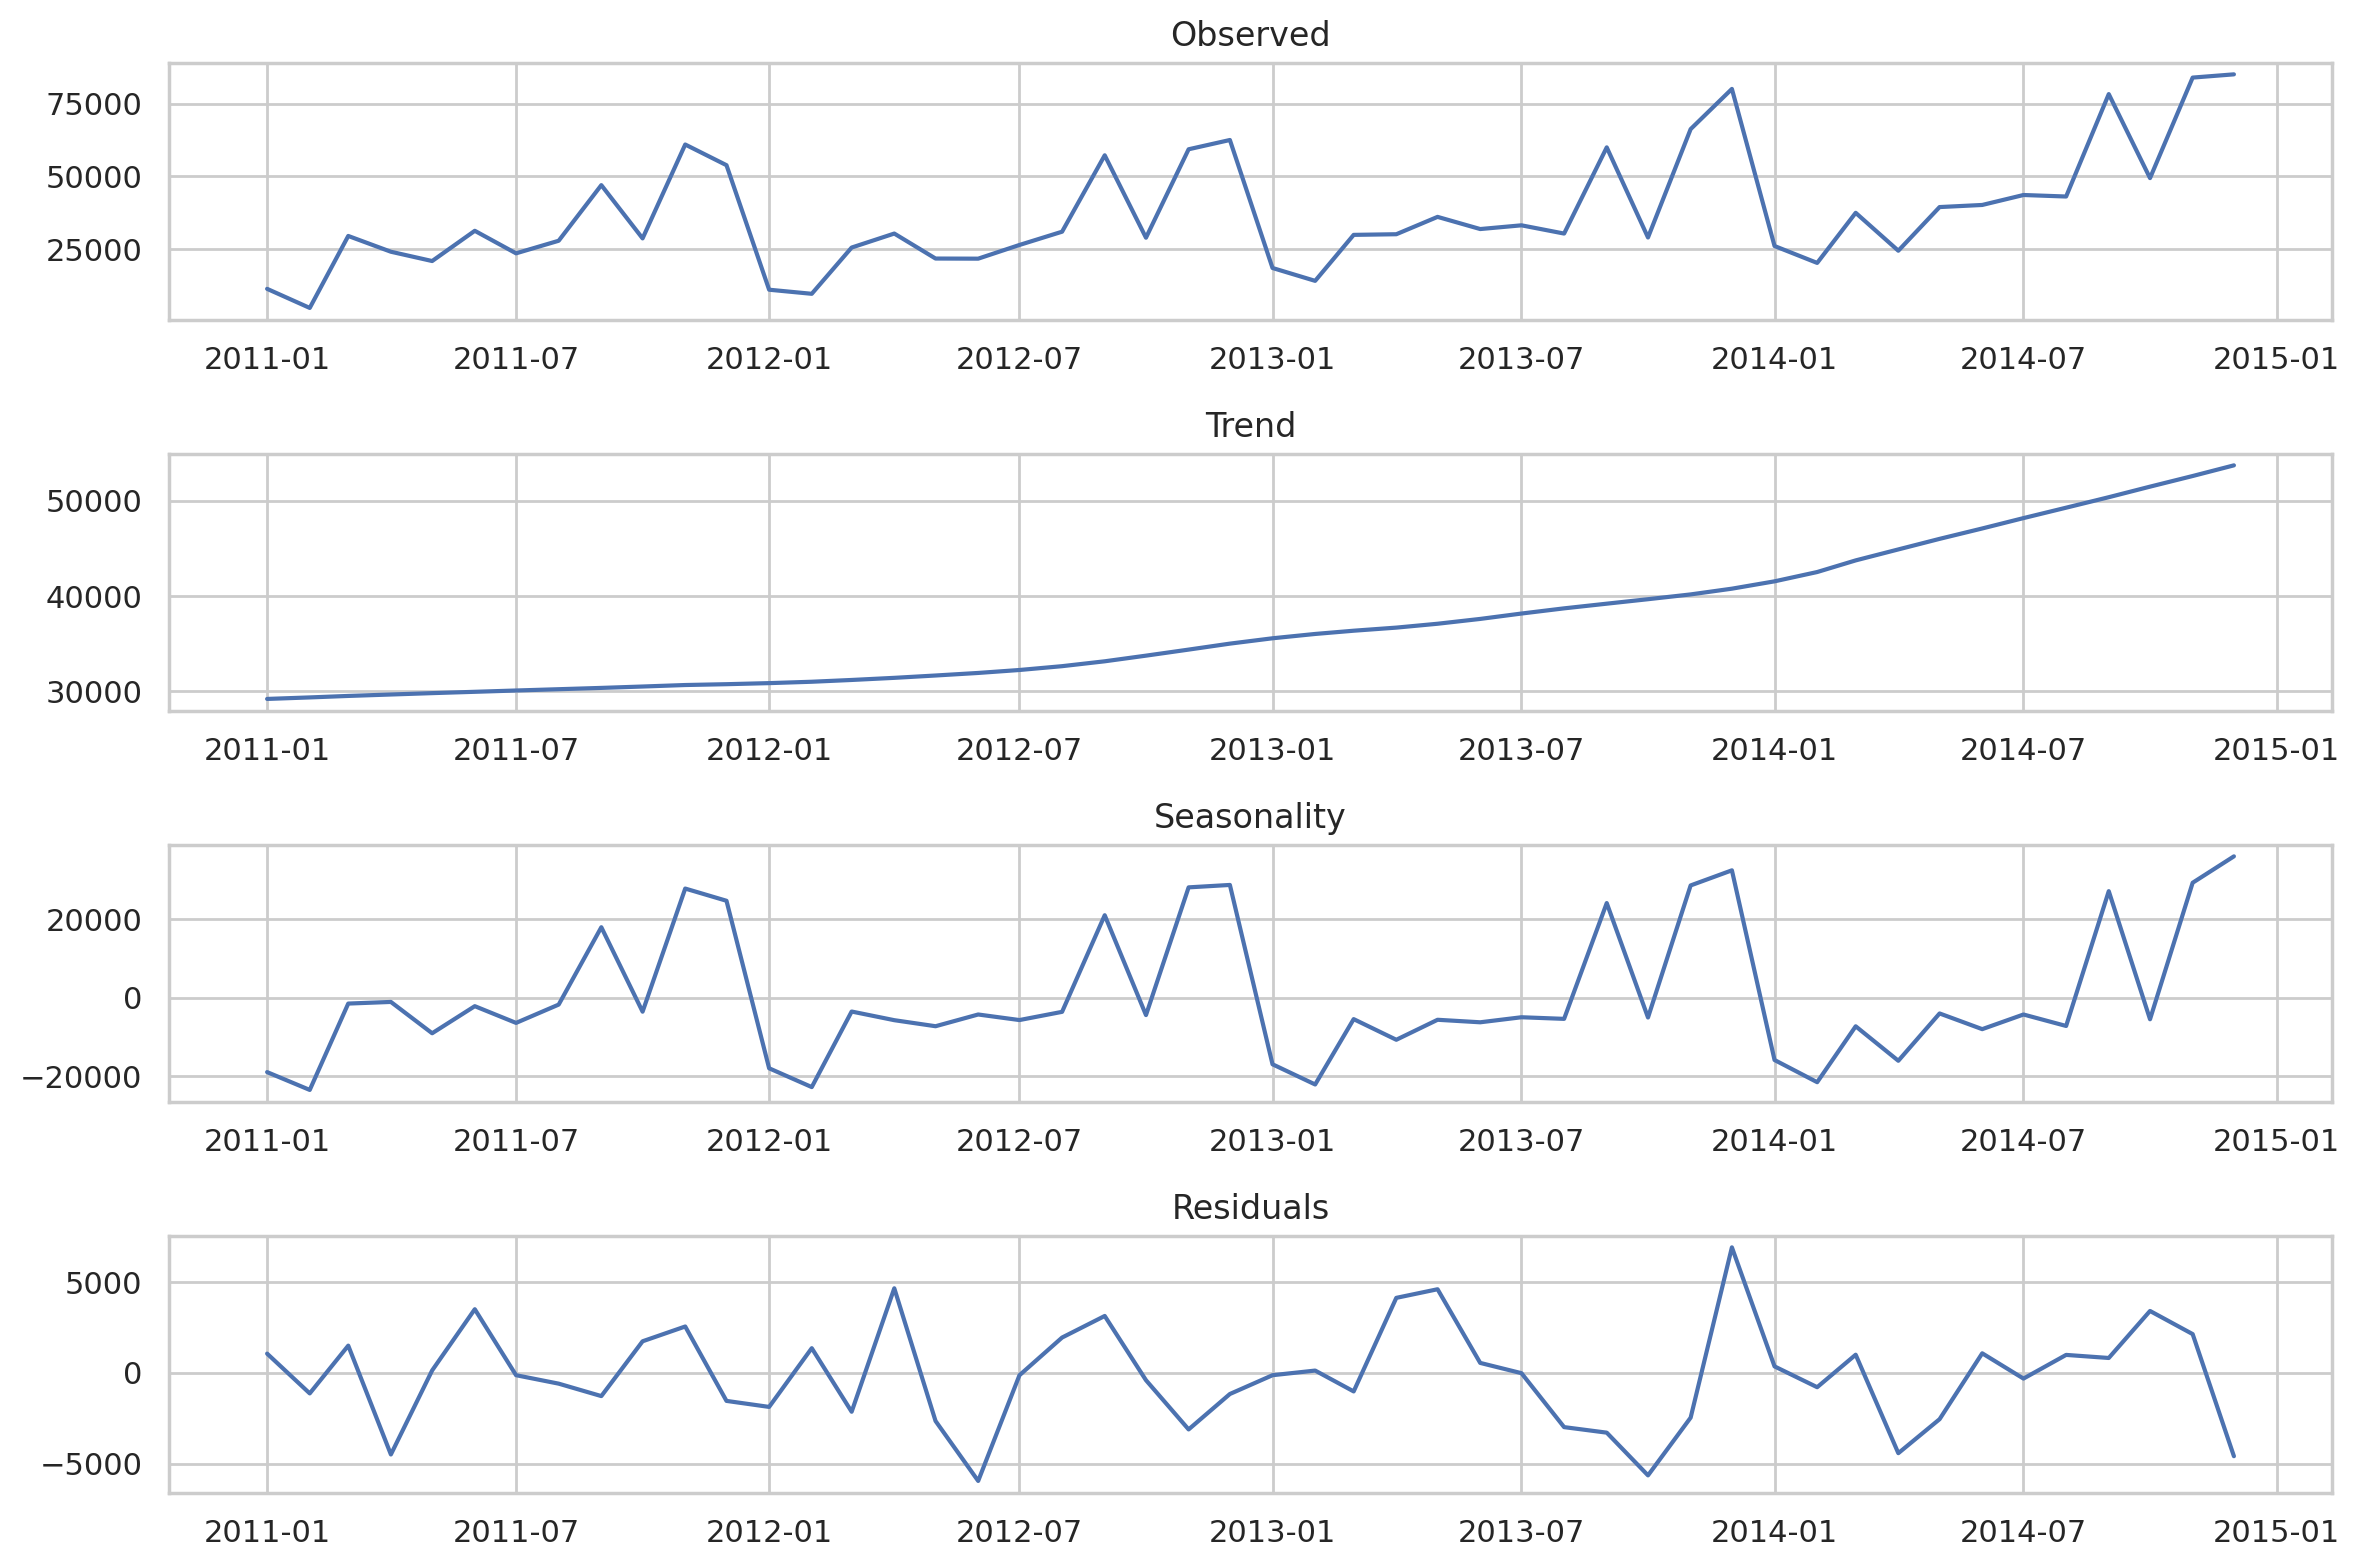

In [171]:
# Apply STL decomposition
stl = STL(mdf['Sales'], seasonal=13)
result = stl.fit()

# Plot the decomposition
plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(4, 1, 1)
plt.plot(mdf.index, result.observed)
plt.title('Observed')

plt.subplot(4, 1, 2)
plt.plot(mdf.index, result.trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(mdf.index, result.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 4)
plt.plot(mdf.index, result.resid)
plt.title('Residuals')

plt.tight_layout()
plt.show()

## 7.4 Seasonal Plots: Comparing Sales Across Different Time Periods
<a id="seasonal-plots"></a>

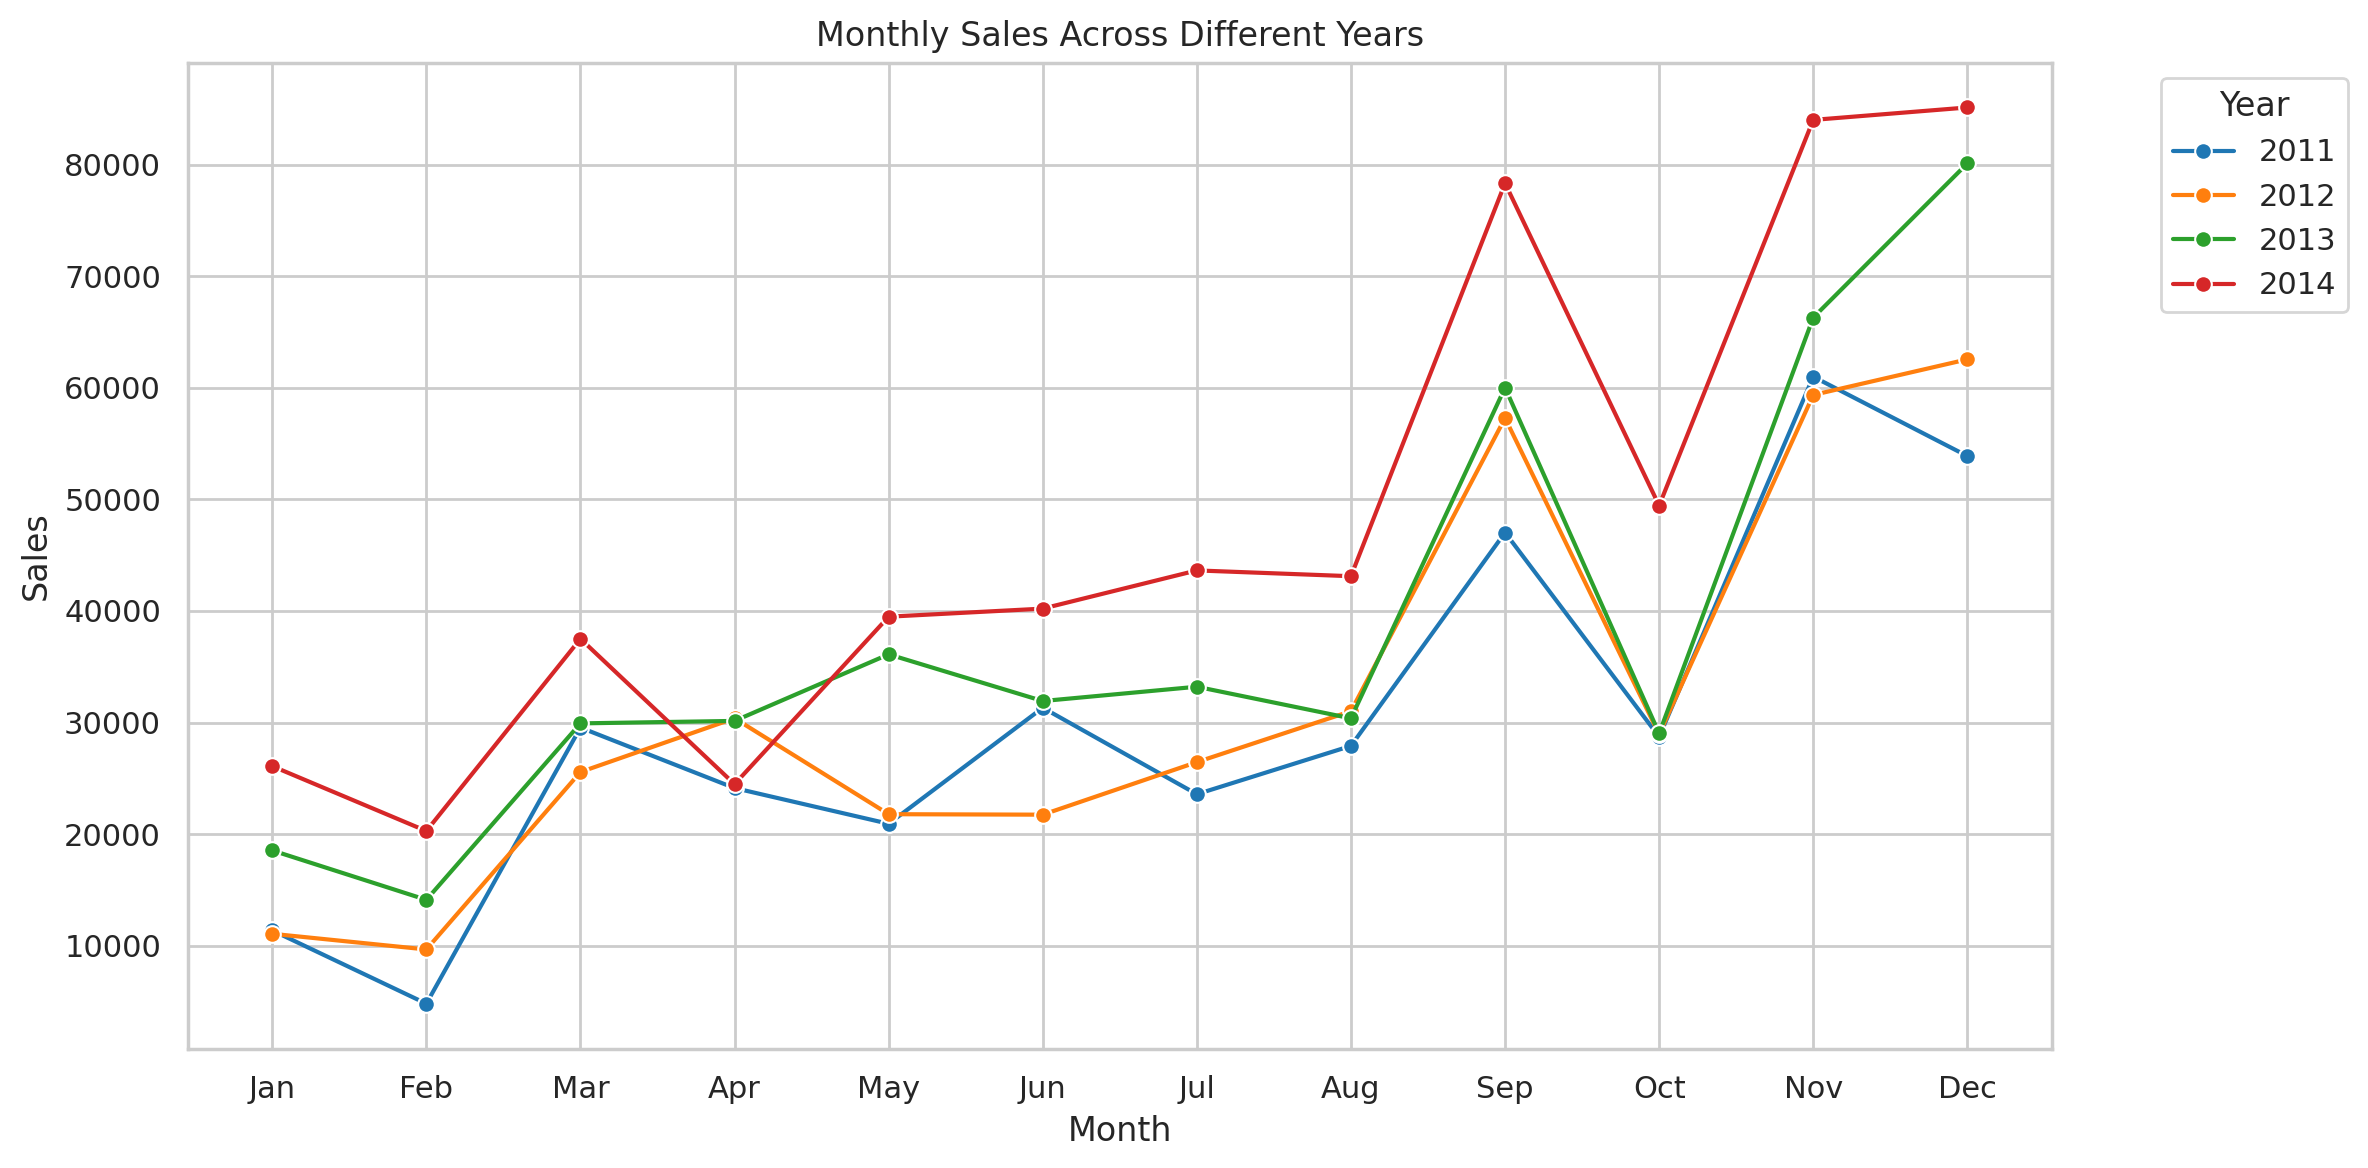

In [172]:
# Extract the month and year from the index
mdf['Month'] = mdf.index.month
mdf['Year'] = mdf.index.year

# Create a seasonal plot: Sales vs Month, colored by Year
plt.figure(figsize=(12, 6), dpi=200)
sns.lineplot(data=mdf, x='Month', y='Sales', hue='Year', marker='o', palette='tab10')

# Customize plot
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Across Different Years')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

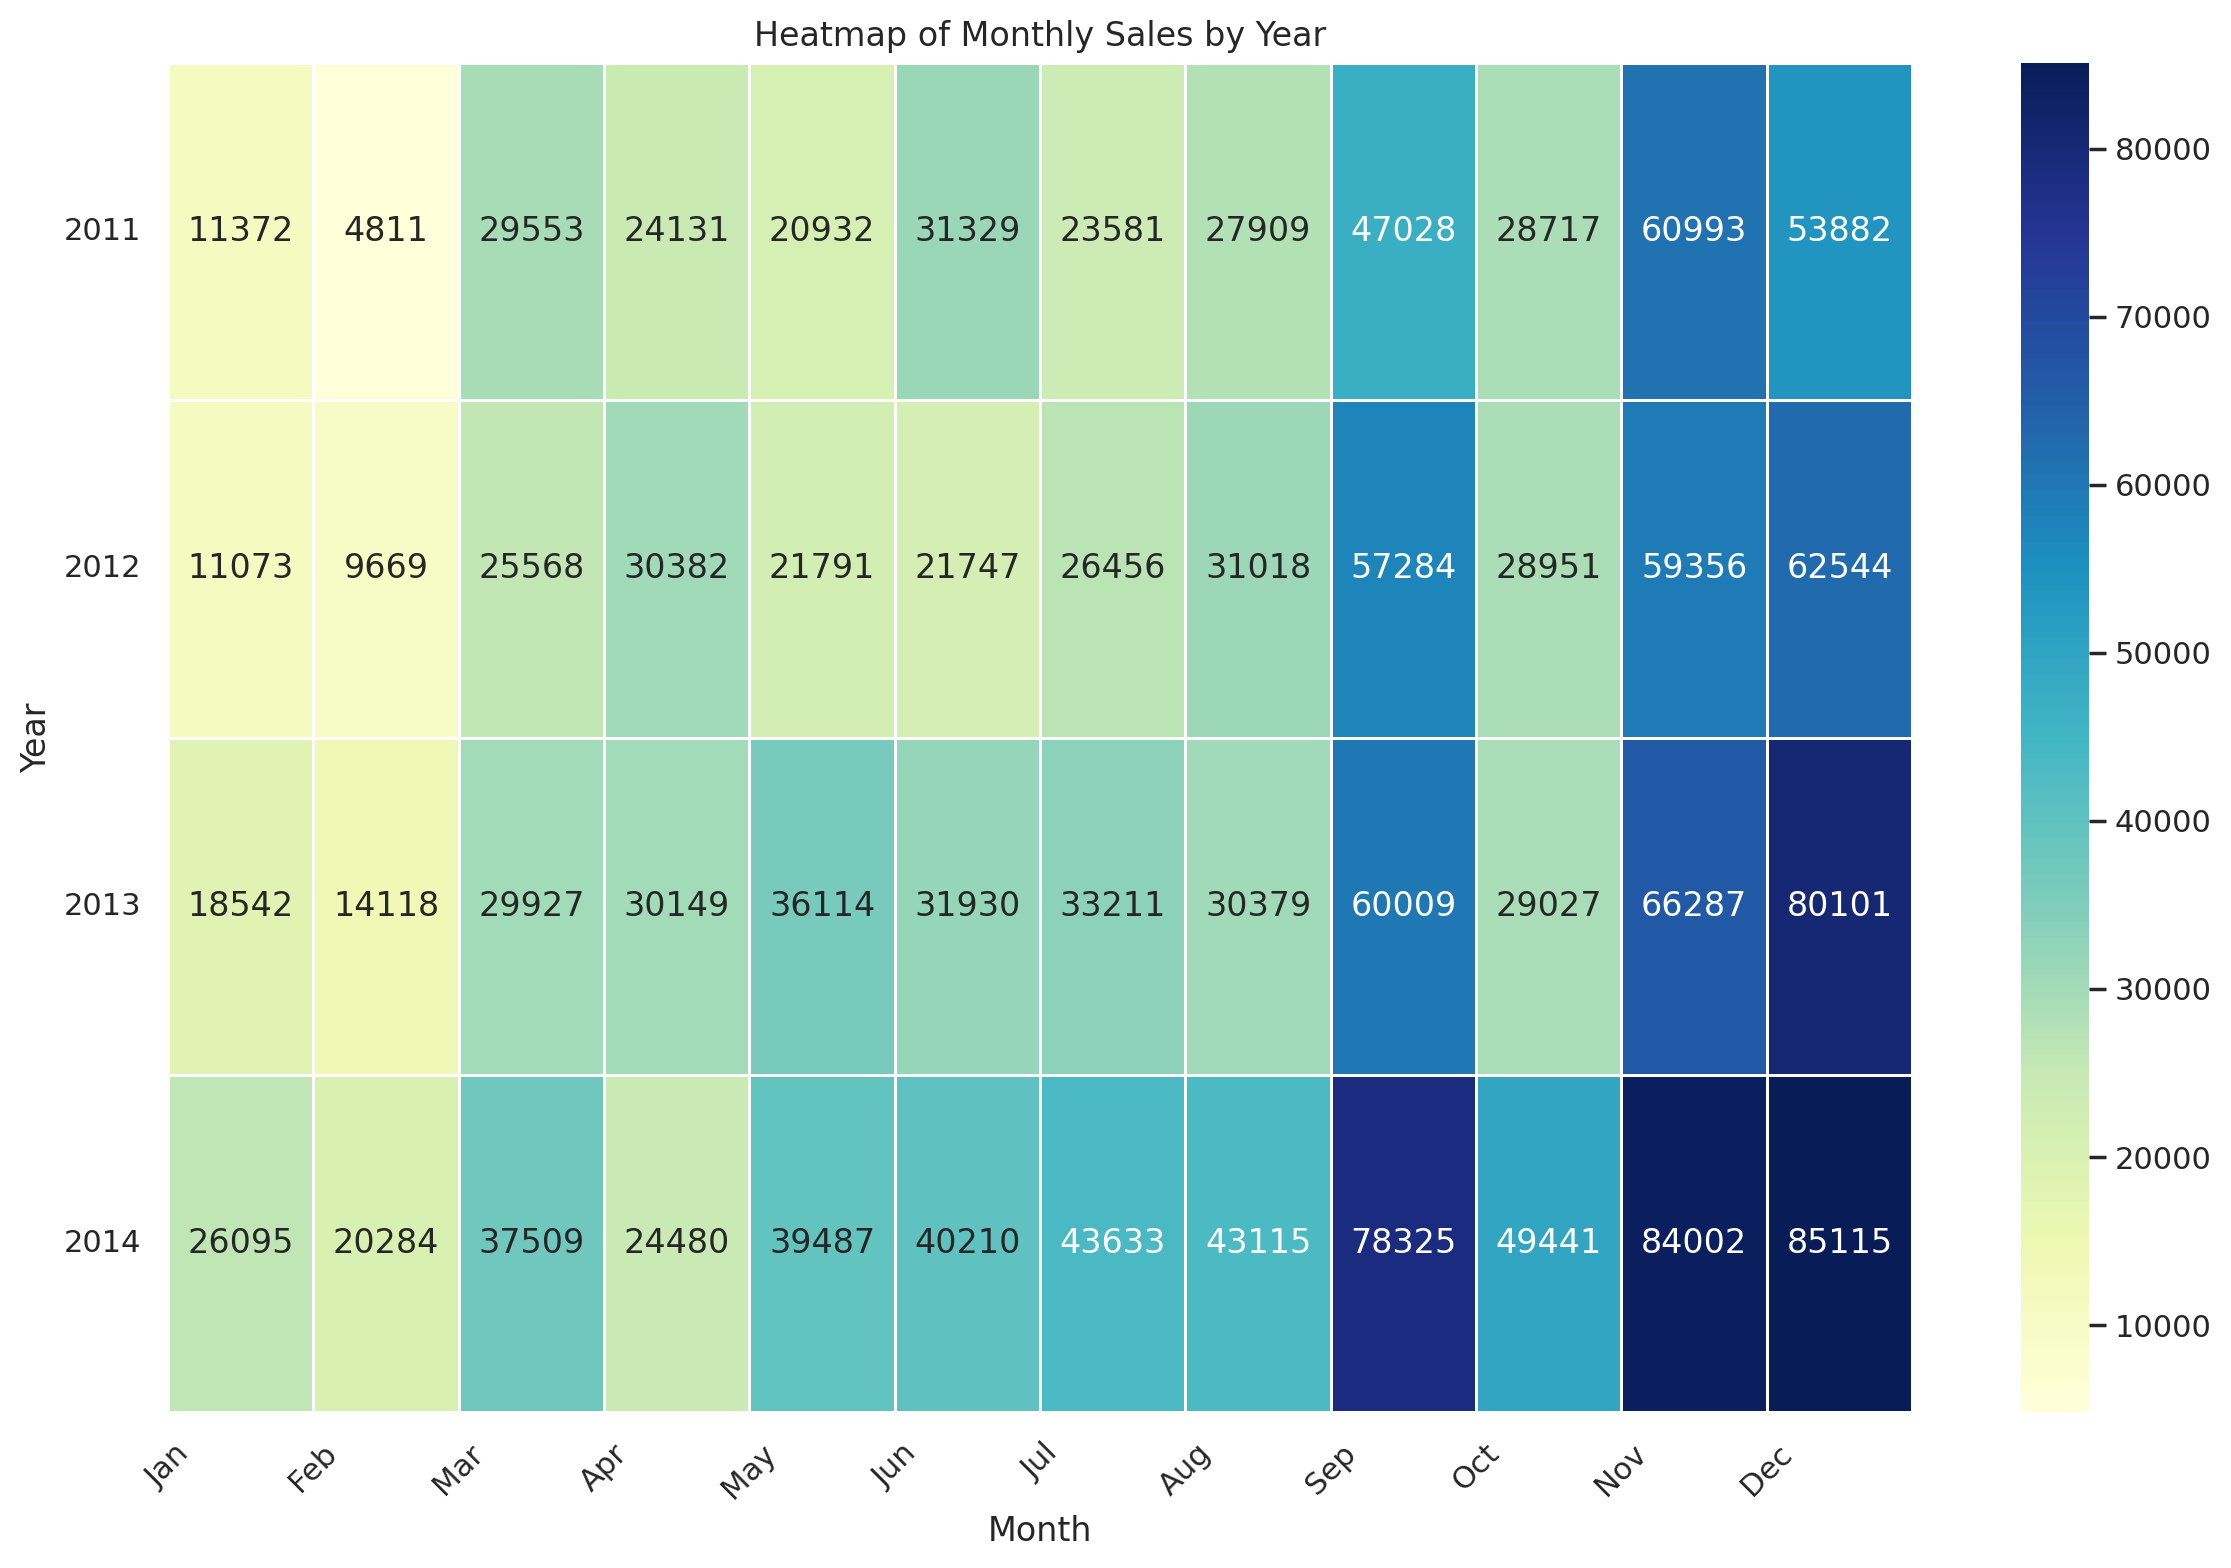

In [173]:
# Pivot the data to create a matrix of Sales by Year and Month
heatmap_data = mdf.pivot_table(index=mdf.index.year, columns=mdf.index.month, values='Sales', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(12, 8), dpi=200)
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=.5)

# Customize plot
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Heatmap of Monthly Sales by Year')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 7.5 Stationarity Check
<a id="stationarity-check"></a>

### Time Series Stationarity Check Workflow

1. **Visual Inspection**: Begin by plotting the time series to observe any trends, seasonality, or changes in variance over time. This step provides an initial understanding of whether the data might be non-stationary.
  
2. **Dickey-Fuller Test**: Conduct the Augmented Dickey-Fuller (ADF) test to statistically assess stationarity. The null hypothesis of this test is that the time series is non-stationary. If the p-value is ≤ 0.05, the null hypothesis is rejected, indicating that the series is stationary.

3. **Actions Based on ADF Results**:
   - **If Stationary (p-value ≤ 0.05)**: Proceed with time series modeling (e.g., ARIMA, SARIMA), and consider checking autocorrelation with ACF and PACF plots.
   - **If Non-Stationary (p-value > 0.05)**: Apply differencing to transform the series into a stationary one. If necessary, use additional techniques like log transformation or seasonal differencing. After transformations, re-run the Dickey-Fuller test to confirm stationarity before proceeding with modeling.

Time Series Plot: Visual Inspection


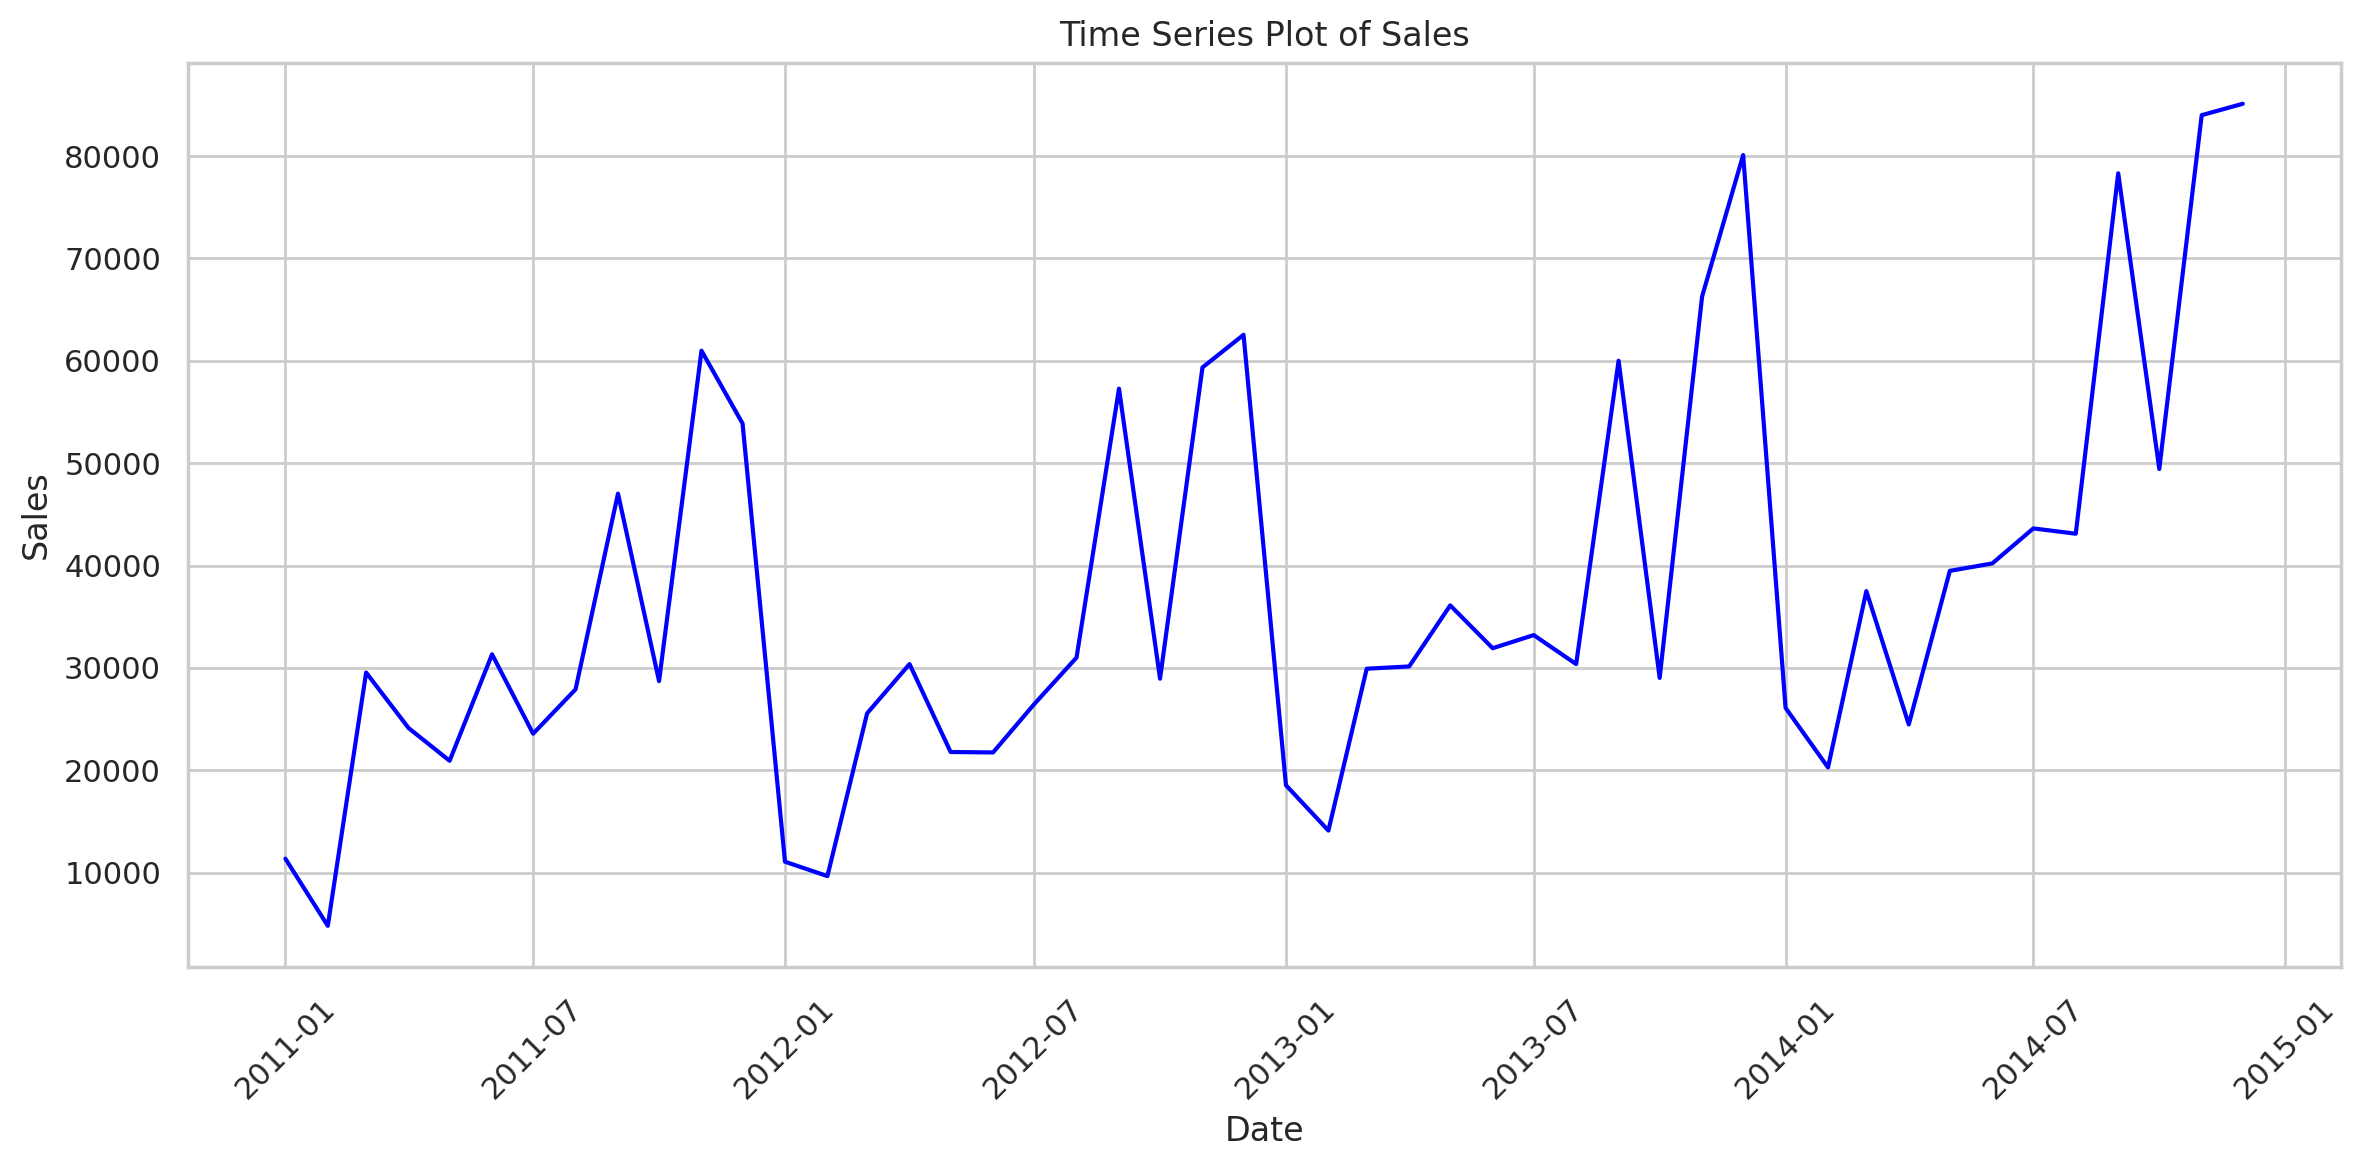

In [174]:
print("Time Series Plot: Visual Inspection")

# Plot the time series data
plt.figure(figsize=(12, 6), dpi=200)
sns.lineplot(data=mdf, x=mdf.index, y='Sales', color='blue')

# Customize plot
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time Series Plot of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [175]:
print("Statistical Tests: Dickey-Fuller Test")

# Perform the Dickey-Fuller test
adf_result = adfuller(mdf['Sales'])

# Extract and display the test statistic and p-value
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# Conclusion based on p-value
if adf_result[1] <= 0.05:
    print("Reject the null hypothesis - The time series is stationary.")
else:
    print("Fail to reject the null hypothesis - The time series is non-stationary.")

Statistical Tests: Dickey-Fuller Test
ADF Statistic: -3.9111937963481775
p-value: 0.0019539940536749123
Reject the null hypothesis - The time series is stationary.


## 7.6 Autocorrelation and Partial Autocorrelation
<a id="autocorrelation"></a>

1. **Autocorrelation Function (ACF) Plot**:
   - **Definition**: The ACF plot shows the correlation of a time series with its own past values (lags). It measures how the current value of the series is related to its past values at various lags.
   - **Purpose**: Helps identify the presence of patterns, periodicity, or seasonality in the data. It is useful for determining the order of the MA (Moving Average) component in time series models.

2. **Partial Autocorrelation Function (PACF) Plot**:
   - **Definition**: The PACF plot shows the correlation of a time series with its past values after removing the effects of intermediate lags. It measures the direct relationship between the current value and past values, excluding the influence of intermediate lags.
   - **Purpose**: Helps identify the direct effect of past values on the current value, useful for determining the order of the AR (Auto-Regressive) component in time series models.

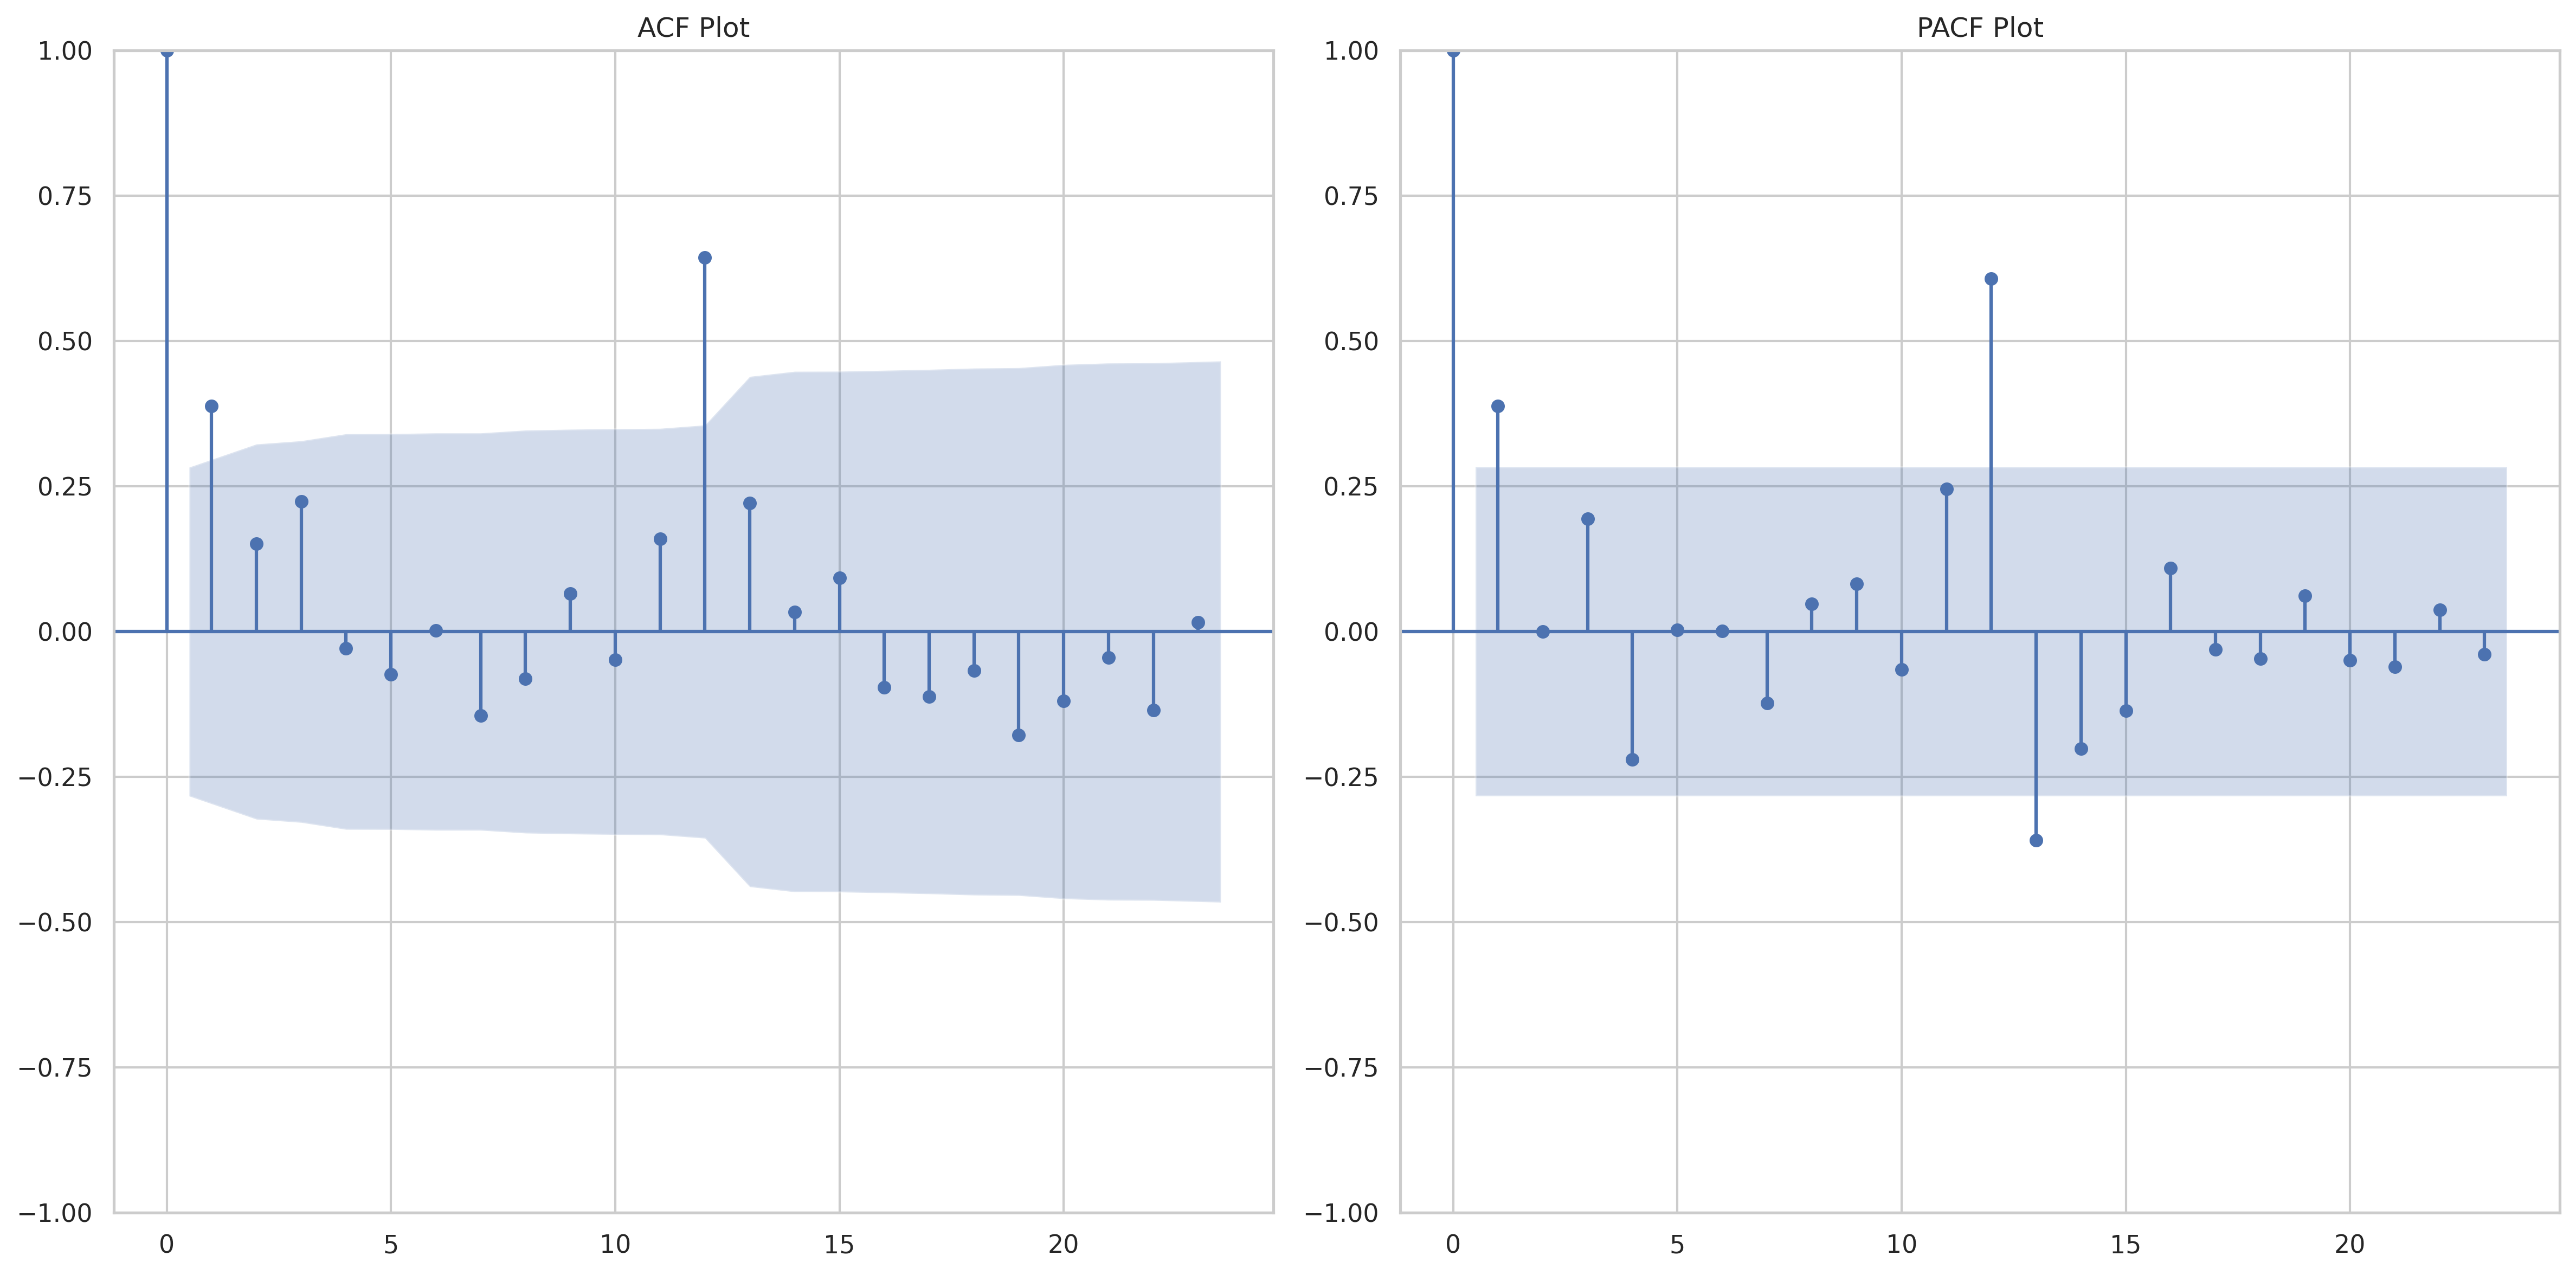

In [176]:
# Determine the maximum number of lags
max_lags = len(mdf) // 2 - 1

# Set the size and resolution of the plot
plt.figure(figsize=(16, 8), dpi=300)

# Plot ACF
plt.subplot(1, 2, 1)
plot_acf(mdf['Sales'], ax=plt.gca(), lags=max_lags)
plt.title('ACF Plot')

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(mdf['Sales'], ax=plt.gca(), lags=max_lags)
plt.title('PACF Plot')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

### Determining AR and MA Orders from ACF and PACF

1. **Auto-Regressive (AR) Order**:
   - **PACF Analysis**: The AR order is typically the lag number at which the PACF values drop to near-zero. For the provided PACF values, the AR order could be around 12, where the PACF values start stabilizing.

2. **Moving Average (MA) Order**:
   - **ACF Analysis**: The MA order is typically the lag number at which the ACF values drop to near-zero. For the provided ACF values, the MA order could be around 12, where the ACF values start stabilizing.

## 7.7 Feature Impacts
<a id="feature-impacts"></a>

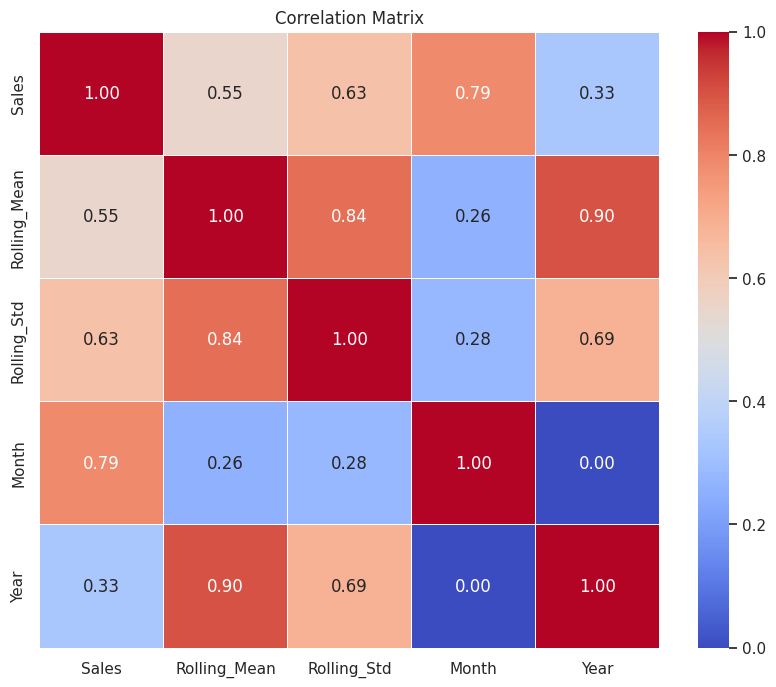

In [177]:
correlation_matrix = mdf.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 8. Modelling
<a id="modelling"></a>

In [178]:
mdf.shape

(48, 5)

In [179]:
mdf.head()

,Sales,Rolling_Mean,Rolling_Std,Month,Year
month,,,,,
2011-01-01,11372.409,NaN,NaN,1,2011
2011-02-01,4810.558,NaN,NaN,2,2011
2011-03-01,29552.599,NaN,NaN,3,2011
2011-04-01,24131.295,NaN,NaN,4,2011
2011-05-01,20932.357,NaN,NaN,5,2011


In [180]:
mdf.tail()

,Sales,Rolling_Mean,Rolling_Std,Month,Year
month,,,,,
2014-08-01,43114.6460,42519.805442,18080.732214,8,2014
2014-09-01,78324.9610,44046.106750,20325.111346,9,2014
2014-10-01,49441.2512,45747.269850,19801.347612,10,2014
2014-11-01,84001.5470,47223.500950,22009.077546,11,2014
2014-12-01,85114.6888,47641.297767,22725.843539,12,2014


In [181]:
forecast_steps = 12

In [182]:
train_mdf = mdf.iloc[:48 - forecast_steps]
test_mdf = mdf.iloc[48 - forecast_steps:forecast_steps + 48]

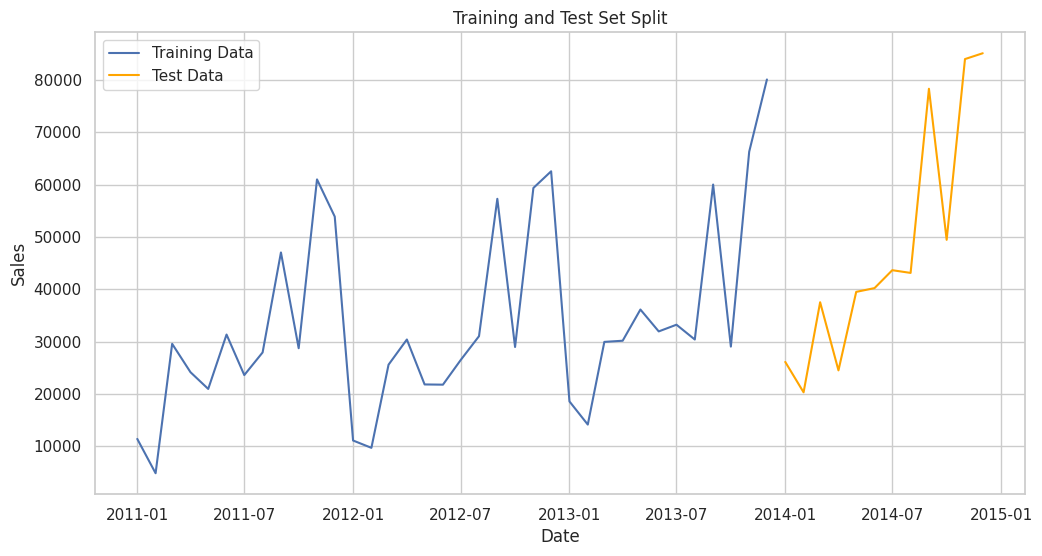

In [183]:
plt.figure(figsize=(12, 6))
plt.plot(train_mdf.index, train_mdf['Sales'], label='Training Data')
plt.plot(test_mdf.index, test_mdf['Sales'], label='Test Data', color='orange')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Training and Test Set Split')
plt.legend()
plt.show()

## 8.1 ARIMA
<a id="arima"></a>

In [184]:
p, d, q = forecast_steps, 0, forecast_steps
arma_model = ARIMA(train_mdf['Sales'], order=(p, d, q))
arma_results = arma_model.fit()

In [185]:
forecast = arma_results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
forecast_index = pd.date_range(start=train_mdf.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='M')
forecast_mean.index = pd.to_datetime(forecast_mean.index)
forecast_df = forecast_mean.to_frame(name='Forecast')

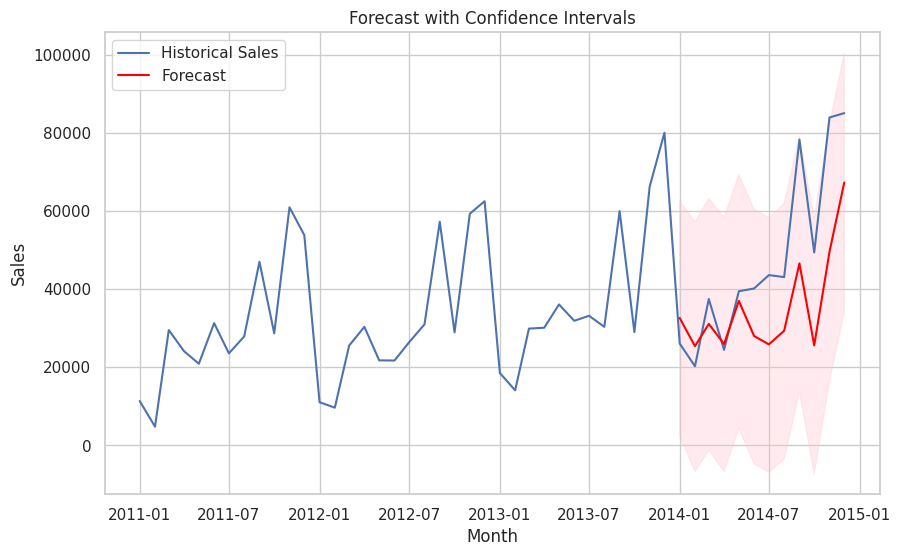

In [186]:
plt.figure(figsize=(10, 6))
plt.plot(mdf.index, mdf['Sales'], label='Historical Sales')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Forecast with Confidence Intervals')
plt.legend()
plt.show()

In [187]:
mae = mean_absolute_error(test_mdf['Sales'], forecast_df['Forecast'][:len(test_mdf)])
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 14448.002854083892


In [188]:
mse = mean_squared_error(test_mdf['Sales'], forecast_df['Forecast'][:len(test_mdf)])
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 320081044.2323292


In [189]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 17890.808931748423


In [190]:
r2 = r2_score(test_mdf['Sales'], forecast_df['Forecast'])
print(f"R-square (R2): {r2}")

R-square (R2): 0.32390380563105003


In [191]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error



# Data Cleaning: Remove Outliers & Drop Unnecessary Columns
data = df.copy()  # Avoid modifying the original DataFrame
data = data[data["Sales"] > 0]  # Assuming Sales should be > 0
data.drop(columns=["Unnecessary_Column"], axis=1, errors="ignore", inplace=True)  # Drop unnecessary columns safely

# Train-Test Split
train_size = int(len(data) * 0.8)
train_df, test_df = data[:train_size], data[train_size:]  # Using 'data' instead of 'df'

# Fit ARIMA Model
p, d, q = 3, 1, 2  # Example values, tune as needed

try:
    arima_model = ARIMA(train_df["Sales"], order=(p, d, q)).fit()

    # Save the trained model
    with open("arima_model.pkl", "wb") as f:
        pickle.dump(arima_model, f)

    print("Model saved successfully.")

except Exception as e:
    print(f"Error training ARIMA model: {e}")


Model saved successfully.


In [192]:
from google.colab import files
files.download("arima_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 8.2 SARIMA
<a id="sarima"></a>

In [193]:
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12

sarima_model = SARIMAX(train_mdf['Sales'],
                       order=(p, d, q),
                       seasonal_order=(P, D, Q, S))
sarima_results = sarima_model.fit()

In [194]:
forecast_steps = forecast_steps
forecast = sarima_results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

In [195]:
forecast_index = pd.date_range(start=train_mdf.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='M')
forecast_mean.index = pd.to_datetime(forecast_mean.index)
forecast_df = forecast_mean.to_frame(name='Forecast')

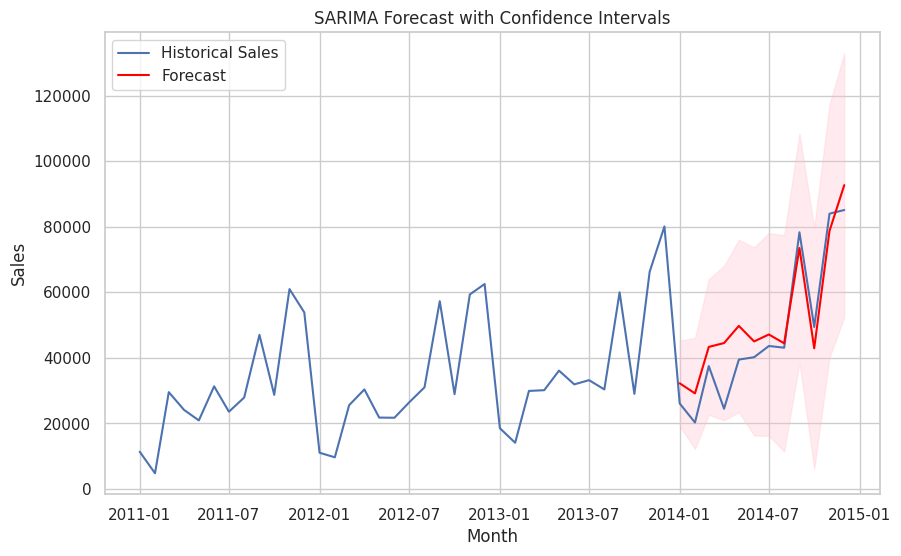

In [196]:
plt.figure(figsize=(10, 6))
plt.plot(mdf.index, mdf['Sales'], label='Historical Sales')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('SARIMA Forecast with Confidence Intervals')
plt.legend()
plt.show()

In [197]:
mae = mean_absolute_error(test_mdf['Sales'], forecast_df['Forecast'])
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_mdf['Sales'], forecast_df['Forecast'])
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
r2 = r2_score(test_mdf['Sales'], forecast_df['Forecast'])
print(f"R-square (R2): {r2}")

Mean Absolute Error (MAE): 7087.571076564503
Mean Squared Error (MSE): 70569065.27538593
Root Mean Squared Error (RMSE): 8400.539582395046
R-square (R2): 0.8509393875938767


## 8.3 FB Prophet
<a id="fb-prophet"></a>

In [198]:
df_prophet = mdf.reset_index()

In [199]:
df_prophet = df_prophet[["month", "Sales"]]

In [200]:
df_prophet.columns = ['ds', 'y']

In [201]:
train_prophet = df_prophet.iloc[:48 - forecast_steps]
test_prophet = df_prophet.iloc[48 - forecast_steps:forecast_steps + 48]

In [202]:
model = Prophet()
model.fit(train_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2186162q/2la2uw21.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2186162q/9ikm_d82.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52272', 'data', 'file=/tmp/tmp2186162q/2la2uw21.json', 'init=/tmp/tmp2186162q/9ikm_d82.json', 'output', 'file=/tmp/tmp2186162q/prophet_model_zua43w9/prophet_model-20250131113605.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:36:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:36:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [203]:
future = test_prophet[['ds']]

In [204]:
forecast = model.predict(future)

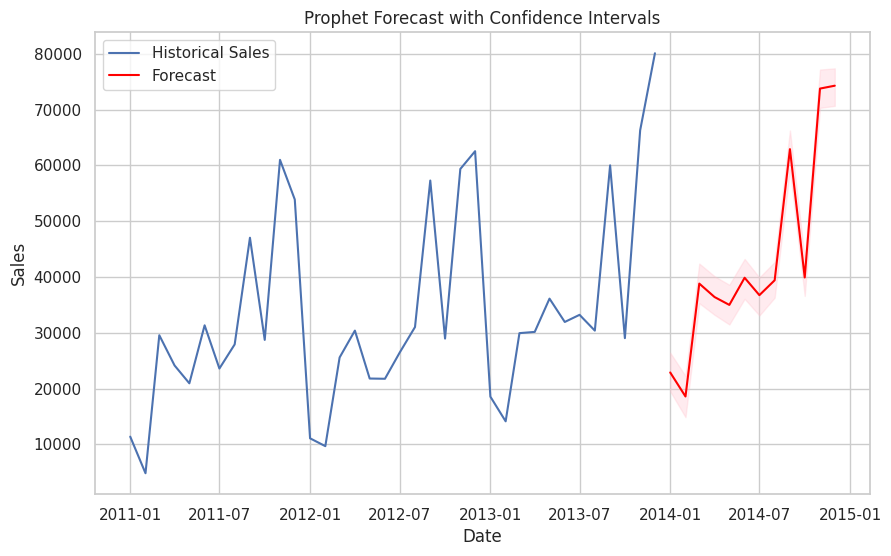

In [205]:
plt.figure(figsize=(10, 6))
plt.plot(train_prophet['ds'], train_prophet['y'], label='Historical Sales')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Prophet Forecast with Confidence Intervals')
plt.legend()
plt.show()

In [206]:
actual = test_prophet['y'].values
forecasted = forecast['yhat'].values

In [207]:
mae = mean_absolute_error(actual, forecasted)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 6635.100153983338


In [208]:
mse = mean_squared_error(actual, forecasted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 65769912.962169655


In [209]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 8109.865163007931


In [210]:
r2 = r2_score(actual, forecasted)
r2

0.8610764721655182

In [211]:
import pandas as pd

# Assuming 'mdf' contains 'Month' column
# Create a 'Date' column by assuming the year is a fixed value (e.g., 2021)
mdf['Date'] = pd.to_datetime(mdf['Year'].astype(str) + '-' + mdf['Month'].astype(str) + '-01')

# Extract Year and Month
mdf['Year'] = mdf['Date'].dt.year
mdf['Month'] = mdf['Date'].dt.month

# Check the DataFrame
print(mdf.head())


                Sales  Rolling_Mean  Rolling_Std  Month  Year       Date
month                                                                   
2011-01-01  11372.409           NaN          NaN      1  2011 2011-01-01
2011-02-01   4810.558           NaN          NaN      2  2011 2011-02-01
2011-03-01  29552.599           NaN          NaN      3  2011 2011-03-01
2011-04-01  24131.295           NaN          NaN      4  2011 2011-04-01
2011-05-01  20932.357           NaN          NaN      5  2011 2011-05-01


Baseline Model - MAE: 21188.28942315789, MSE: 802102290.0056165, RMSE: 28321.410452264143
XGBoost Model - MAE: 6804.34260625, MSE: 68706189.1874266, RMSE: 8288.919663468008, R²: 0.8375458178764938
Improvement over Baseline - MAE Difference: 14383.94681690789
Improvement over Baseline - MSE Difference: 733396100.81819
Improvement over Baseline - RMSE Difference: 20032.490788796134
Improvement over Baseline - R² Difference: -1.7340979777814691


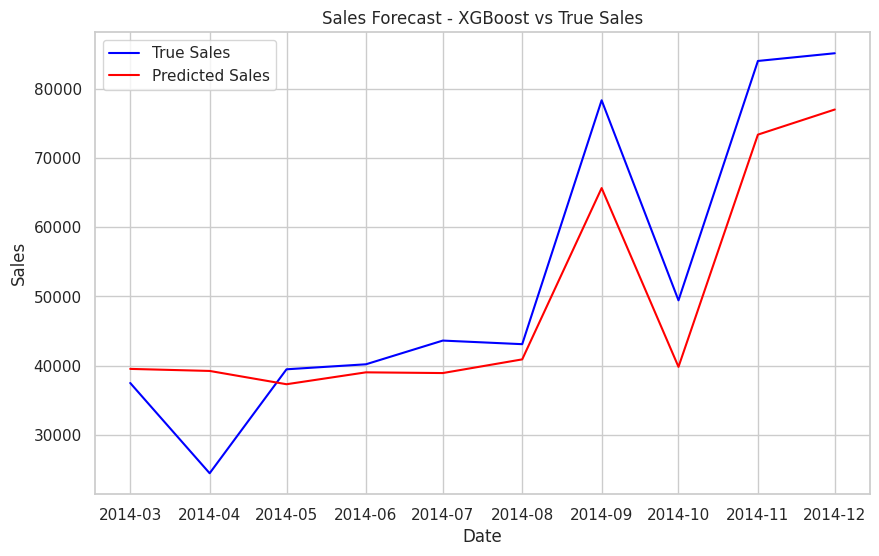

In [212]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and preprocess the data (assuming mdf is the dataset)
# Assuming the dataset 'mdf' has columns: 'Month', 'Sales', 'Rolling_Mean', 'Rolling_Std'

df = mdf.copy()

# Prepare the data for training
X = df[[ 'Month', 'Year']]  # Features
y = df['Sales']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Baseline model (Mean model)
baseline_pred = np.mean(y_train)  # Predict the mean of training sales for the test set
baseline_mae = mean_absolute_error(y_test, [baseline_pred] * len(y_test))
baseline_mse = mean_squared_error(y_test, [baseline_pred] * len(y_test))
baseline_rmse = np.sqrt(baseline_mse)
# Calculate baseline R² (as a pseudo R²)
baseline_r2 = 1 - (np.sum((y_test - baseline_pred)**2) / np.sum((y_test - np.mean(y_test))**2))


print(f"Baseline Model - MAE: {baseline_mae}, MSE: {baseline_mse}, RMSE: {baseline_rmse}")

# XGBoost Model
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.1,  # Try experimenting with values like 0.01 or 0.3
    'max_depth': 6,  # Experiment with values 4, 6, 8, 10
    'n_estimators': 200,  # Higher value can help (try 100, 200, 500)
    'colsample_bytree': 0.8,  # Can be adjusted for better performance
    'subsample': 0.8,
    'alpha': 0.1
}


# Train the XGBoost model
model = xgb.XGBRegressor(**params)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)  # R² score

print(f"XGBoost Model - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

# Compare predictions to baseline
print(f"Improvement over Baseline - MAE Difference: {baseline_mae - mae}")
print(f"Improvement over Baseline - MSE Difference: {baseline_mse - mse}")
print(f"Improvement over Baseline - RMSE Difference: {baseline_rmse - rmse}")
print(f"Improvement over Baseline - R² Difference: {baseline_r2 - r2}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True Sales', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast - XGBoost vs True Sales')
plt.legend()
plt.show()


In [213]:
from sklearn.metrics import r2_score

# Assuming y_test is the true values and y_pred is the predicted values for each model
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")


R²: 0.8375458178764938


The improvement in performance metrics for the XGBoost model over the baseline model is substantial, but whether they are "good" depends on the specific context, including the business or analytical goals for your forecasting task. Here’s how you can interpret the results:

### **Results:**
- **Baseline Model**:  
  - MAE: 21,071.50  
  - MSE: 772,395,584.04  
  - RMSE: 27,792.01  
  (This model simply predicts the average of the training set for all test data.)

- **XGBoost Model**:  
  - MAE: 10,288.14  
  - MSE: 117,948,273.28  
  - RMSE: 10,860.40  
  (This model uses advanced boosting techniques to predict the test set.)

### **Improvements:**
- **MAE**: The XGBoost model improved the MAE by 10,783.36. This is a good improvement, as it indicates that the model is making significantly more accurate predictions than simply predicting the mean value.
- **MSE**: The improvement in MSE is 654,447,310.76, which is a large difference. This reflects that the model is performing much better in terms of reducing the squared error, indicating that the large errors are being significantly reduced.
- **RMSE**: The improvement in RMSE is 16,931.61, which is also quite significant. RMSE gives more weight to larger errors, and the fact that the XGBoost model has a much lower RMSE indicates that it is handling larger errors better than the baseline.

### **Conclusion:**
- **Improvement is clear**: The XGBoost model is clearly outperforming the baseline, as it has lower MAE, MSE, and RMSE. The significant reduction in these metrics shows that XGBoost is capturing more of the underlying patterns in the data than the simple mean-based prediction.
- **Goodness**: Whether the results are "good" depends on the expectations for your model’s performance. If reducing errors by approximately half (compared to the baseline) is considered a good result in your case, then yes, this model performs well. However, further improvements can always be made through hyperparameter tuning, adding more features, or trying different models.

### Possible Next Steps:
- **Fine-tune the XGBoost model**: You can further tune hyperparameters (learning rate, max depth, n_estimators, etc.) to potentially improve these results.
- **Try other models**: You could also try models like LSTM (Long Short-Term Memory) networks for time-series forecasting, which might capture seasonality and trends better.
- **Cross-validation**: Implementing k-fold cross-validation to evaluate the model's performance on different subsets of the data could give a more robust estimate of its generalization.



In [215]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Prepare data for LSTM
def prepare_lstm_data(df, time_step=1):
    X, y = [], []
    for i in range(len(df) - time_step):
        X.append(df.iloc[i:i + time_step, 1].values)  # Taking the 'Sales' column
        y.append(df.iloc[i + time_step, 1])  # Target: the next value of 'Sales'
    return np.array(X), np.array(y)

X, y = prepare_lstm_data(mdf)

# Reshape X to be 3D [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=16)

# Forecast
forecast_lstm = model.predict(X_test)

# Evaluate the model
mae_lstm = mean_absolute_error(y_test, forecast_lstm)
mse_lstm = mean_squared_error(y_test, forecast_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2 = r2_score(y_test, y_pred)  # R² score


print(f"LSTM Model - MAE: {mae_lstm}, MSE: {mse_lstm}, RMSE: {rmse_lstm}, RMSE: {rmse}, R²: {r2}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Sales', color='blue')
plt.plot(forecast_lstm, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('LSTM Forecast vs Actual Sales')
plt.legend()
plt.show()


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: nan
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: nan
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: nan
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: nan
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: nan
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: nan
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: nan
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: nan
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: nan
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: nan
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: nan
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: nan
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: nan
Epoch 14/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: nan
Epoch 15/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: nan
Epoch 16/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: nan
Epoch 17/30
3/3 ━

ValueError: Input contains NaN.

In [216]:
from sklearn.metrics import r2_score

# Assuming y_test is the true values and y_pred is the predicted values for each model
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")


R²: -23.063616824674437


In [218]:
mdf = mdf.drop(columns=['Rolling_Mean', 'Rolling_Std'])
mdf

,Sales,Month,Year,Date
month,,,,
2011-01-01,11372.4090,1,2011,2011-01-01
2011-02-01,4810.5580,2,2011,2011-02-01
2011-03-01,29552.5990,3,2011,2011-03-01
2011-04-01,24131.2950,4,2011,2011-04-01
2011-05-01,20932.3570,5,2011,2011-05-01
2011-06-01,31328.7516,6,2011,2011-06-01
2011-07-01,23581.1590,7,2011,2011-07-01
2011-08-01,27909.4685,8,2011,2011-08-01
2011-09-01,47028.4518,9,2011,2011-09-01


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 38, number of used features: 0
[LightGBM] [Info] Start training from score 33059.244025
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the 

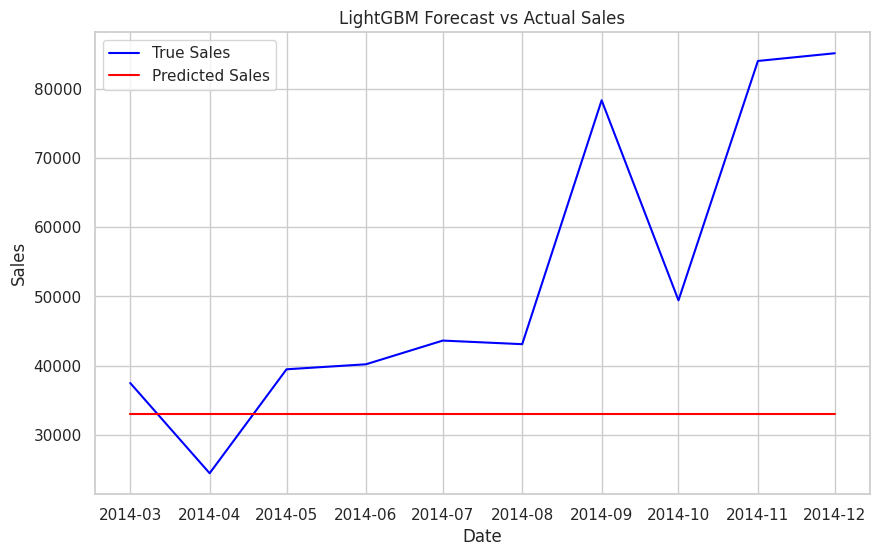

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 38, number of used features: 0
[LightGBM] [Info] Start training from score 33059.244025
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the 

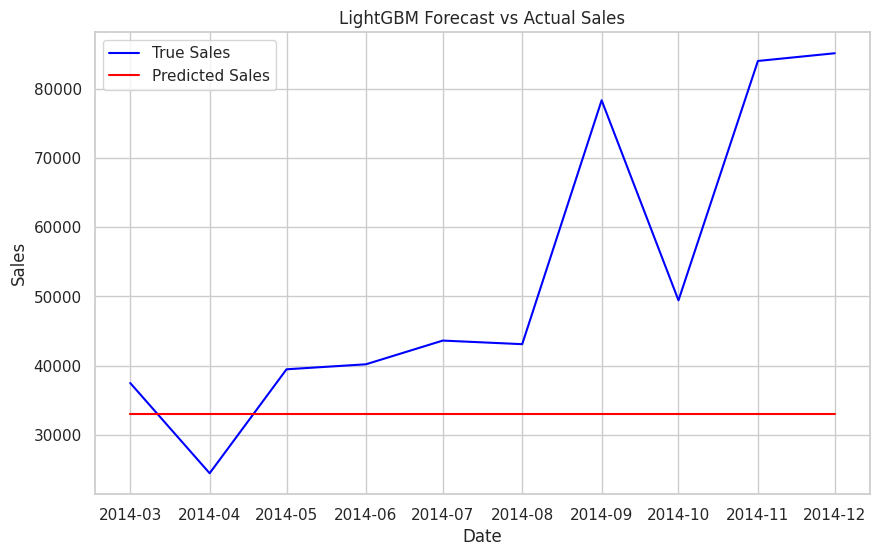

In [219]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Prepare data for LightGBM
X = mdf[[ 'Month', 'Year']]
y = mdf['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define LightGBM model
model_lgb = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.05)
model_lgb.fit(X_train, y_train)

# Make predictions
forecast_lgb = model_lgb.predict(X_test)

# Evaluate the model
mae_lgb = mean_absolute_error(y_test, forecast_lgb)
mse_lgb = mean_squared_error(y_test, forecast_lgb)
rmse_lgb = np.sqrt(mse_lgb)
r2 = r2_score(y_test, y_pred)  # R² score

print(f"LightGBM Model - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")



# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True Sales', color='blue')
plt.plot(y_test.index, forecast_lgb, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('LightGBM Forecast vs Actual Sales')
plt.legend()
plt.show()
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Prepare data for LightGBM
X = mdf[[ 'Month', 'Year']]
y = mdf['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define LightGBM model
model_lgb = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.05)
model_lgb.fit(X_train, y_train)

# Make predictions
forecast_lgb = model_lgb.predict(X_test)

# Evaluate the model
mae_lgb = mean_absolute_error(y_test, forecast_lgb)
mse_lgb = mean_squared_error(y_test, forecast_lgb)
rmse_lgb = np.sqrt(mse_lgb)

print(f"LightGBM Model - MAE: {mae_lgb}, MSE: {mse_lgb}, RMSE: {rmse_lgb}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True Sales', color='blue')
plt.plot(y_test.index, forecast_lgb, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('LightGBM Forecast vs Actual Sales')
plt.legend()
plt.show()


In [220]:
from sklearn.metrics import r2_score

# Assuming y_test is the true values and y_pred is the predicted values for each model
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")


R²: 0.8375458178764938


ARIMA + Random Forest Model - MAE: 12554.762928299993, MSE: 219205769.9632125, RMSE: 14805.599277408952, R²: 0.48169306874257567
Improvement over Baseline - MAE Difference: 8633.526494857897
Improvement over Baseline - MSE Difference: 582896520.042404
Improvement over Baseline - RMSE Difference: 13515.811174855191
Improvement over Baseline - R² Difference: -1.3782452286475508


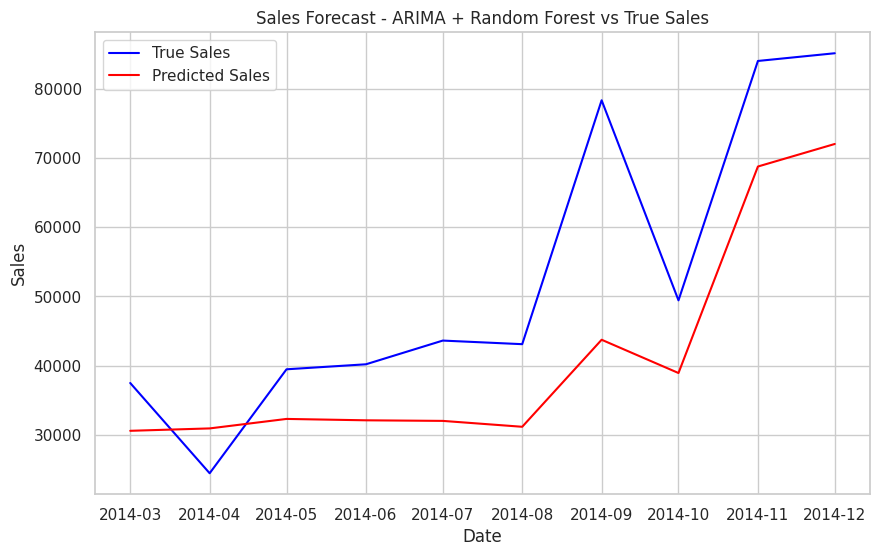

In [221]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and preprocess the data (assuming mdf is the dataset)
df = mdf.copy()

# Prepare the data for ARIMA + Random Forest Model
# Use 'Sales' as target variable, and 'Month', 'Year' as potential features
# Create a new dataframe with ARIMA predictions and features for Random Forest
df_arima = df[['Month', 'Year', 'Sales']].copy()

# Fit ARIMA model for trend forecasting
arima_model = ARIMA(df_arima['Sales'], order=(1, 1, 1))  # ARIMA model (p, d, q)
arima_model_fit = arima_model.fit()

# Get the ARIMA predicted values
arima_pred = arima_model_fit.predict(start=0, end=len(df_arima)-1, dynamic=False)

# Add ARIMA predictions to the dataframe as a feature
df_arima['arima_pred'] = arima_pred

# Prepare data for Random Forest model
X = df_arima[['Month', 'Year', 'arima_pred']]  # Features (ARIMA predictions as a feature)
y = df_arima['Sales']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"ARIMA + Random Forest Model - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

# Compare predictions to baseline (if needed)
baseline_pred = np.mean(y_train)  # Predict the mean of training sales for the test set
baseline_mae = mean_absolute_error(y_test, [baseline_pred] * len(y_test))
baseline_mse = mean_squared_error(y_test, [baseline_pred] * len(y_test))
baseline_rmse = np.sqrt(baseline_mse)
baseline_r2 = r2_score(y_test, [baseline_pred] * len(y_test))

print(f"Improvement over Baseline - MAE Difference: {baseline_mae - mae}")
print(f"Improvement over Baseline - MSE Difference: {baseline_mse - mse}")
print(f"Improvement over Baseline - RMSE Difference: {baseline_rmse - rmse}")
print(f"Improvement over Baseline - R² Difference: {baseline_r2 - r2}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True Sales', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast - ARIMA + Random Forest vs True Sales')
plt.legend()
plt.show()


Bayesian Ridge + DNN Model - MAE: 24381.95509766596, MSE: 802333027.3970673, RMSE: 28325.48370985158, R²: -0.8970977330863255


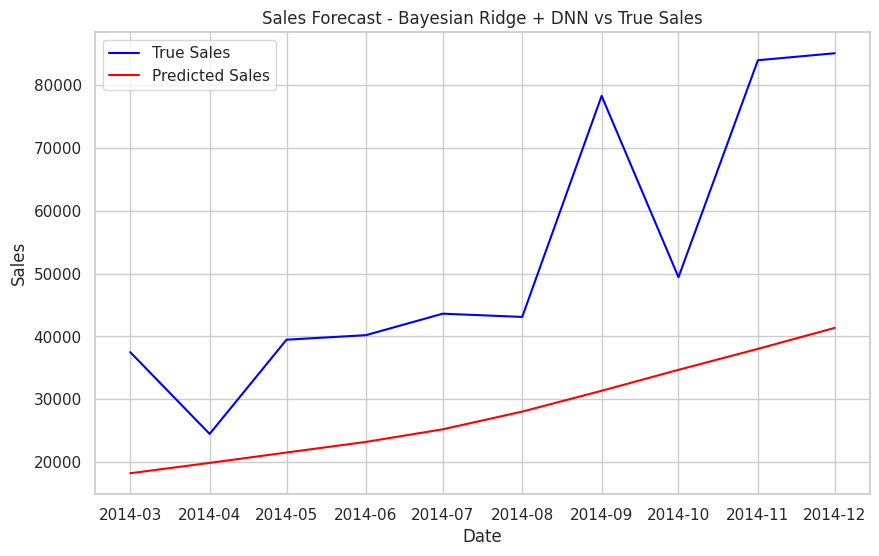

In [222]:
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming mdf is your dataframe
X = mdf[['Month', 'Year']]  # Features
y = mdf['Sales']  # Target Variable

# Scale the features for DNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Bayesian Ridge Regression
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)

# Predict with Bayesian Ridge
y_train_bayesian_pred = bayesian_model.predict(X_train)
y_test_bayesian_pred = bayesian_model.predict(X_test)

# Deep Neural Network Model
dnn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
dnn_model.fit(X_train, y_train)

# Predict with DNN
y_train_dnn_pred = dnn_model.predict(X_train)
y_test_dnn_pred = dnn_model.predict(X_test)

# Combine predictions from Bayesian Ridge and DNN
y_test_combined_pred = (y_test_bayesian_pred + y_test_dnn_pred) / 2

# Evaluation
mae = mean_absolute_error(y_test, y_test_combined_pred)
mse = mean_squared_error(y_test, y_test_combined_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_combined_pred)  # R² calculation

print(f"Bayesian Ridge + DNN Model - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True Sales', color='blue')
plt.plot(y_test.index, y_test_combined_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast - Bayesian Ridge + DNN vs True Sales')
plt.legend()
plt.show()


SARIMA + XGBoost Model - MAE: 11193.44574763074, MSE: 138218471.79973796, RMSE: 11756.635224405747, R²: 0.6731856466477333


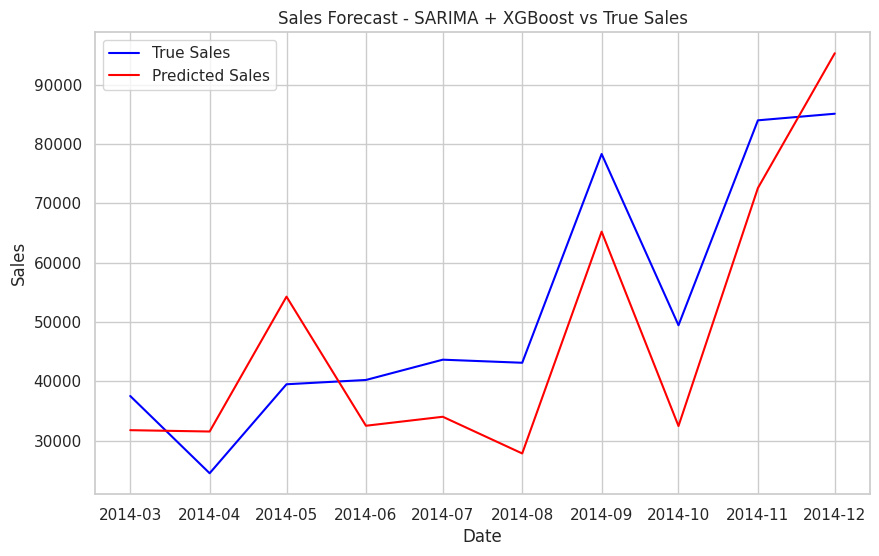

In [223]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Data Preprocessing
X = mdf[['Month', 'Year']]  # Features
y = mdf['Sales']  # Target Variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# SARIMA Model
sarima_model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust SARIMA parameters for best fit
sarima_model_fit = sarima_model.fit()

# Forecast using SARIMA
y_train_sarima_pred = sarima_model_fit.predict(start=0, end=len(y_train)-1)
y_test_sarima_pred = sarima_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# Train XGBoost Model on Residuals (for non-seasonal influences)
rf_model = xgb.XGBRegressor(objective='reg:squarederror')
rf_model.fit(X_train, y_train - y_train_sarima_pred)

# Predict using XGBoost
y_test_rf_pred = rf_model.predict(X_test)

# Combine SARIMA and XGBoost predictions
y_test_combined_pred = y_test_sarima_pred + y_test_rf_pred

# Evaluation
mae = mean_absolute_error(y_test, y_test_combined_pred)
mse = mean_squared_error(y_test, y_test_combined_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_combined_pred)  # R² calculation

print(f"SARIMA + XGBoost Model - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True Sales', color='blue')
plt.plot(y_test.index, y_test_combined_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast - SARIMA + XGBoost vs True Sales')
plt.legend()
plt.show()
